 # **Project Title-: Mobile Phone Price Predictor**
 #### **Group No -: 22**
 #### **Group Members -:**
 ##### Lorensuhewa S.J-EG/2021/4648
 ##### Rashmi E.D.K-   EG/2021/4748
 

 
 




# **1.Introduction** 
The mobile phone industry is highly competitive, with prices influenced by factors like hardware specifications, brand reputation, and market trends. Accurately predicting mobile phone prices based on their features is valuable for manufacturers, retailers, and consumers to make informed decisions.

This project aims to develop a machine learning model to estimate mobile phone prices using a dataset from Kaggle. We employ two algorithms: Linear Regression, known for its simplicity in modeling linear relationships, and Random Forest, an ensemble method capable of capturing complex patterns.

By comparing the performance of these algorithms, we provide insights into their accuracy and practical applications. This project demonstrates the potential of machine learning in understanding pricing strategies while offering a useful tool for stakeholders in the mobile phone market.



# **2.Literature Survey**
The mobile phone has become an essential part of daily life, and accurate price prediction using machine learning algorithms is beneficial for consumers and manufacturers alike. Machine learning techniques have demonstrated high accuracy in forecasting mobile phone prices by analyzing key factors such as RAM, storage, and camera quality. Supervised learning methods, including Linear Regression and Random Forest, are commonly used to train models and generate reliable predictions.

Linear Regression serves as a simple and effective baseline for price prediction, while ensemble methods like Random Forest provide higher precision by capturing complex patterns. Advanced algorithms such as XGB Regressor and Support Vector Machine (SVM) have also shown success in improving prediction accuracy by leveraging historical data. Additionally, techniques like variable influence analysis in Random Forest help identify the most impactful features for price determination.

Despite these advancements, current research lacks consensus on a universal approach for mobile phone price prediction, emphasizing the need for further exploration to refine existing models and methodologies.

# **3.Dataset Description**
The dataset utilized in this research is sourced from kaggle, including a multitude of factors pertaining to mobile phones. The dataset consists of 161 rows and 14 columns, wherein each row represents a distinct phone model along with its corresponding impact factors on price.

| Column       | Description                  |
|--------------|------------------------------|
| 1st Column   | ID of each cellphone         |
| 2nd Column   | Price of each cellphone        |
| 3rd Column   | Sales number of each cellphone       |
| 4th Column   | Weight of each cellphone        |
| 5th Column   | Resolution of each cellphone       |
| 6th Column   | Phone Pixel Density of each cellphone       |
| 7th Column   | Type of CPU core in each cellphone       |
| 8th Column   | CPU Frequency in each cellphone        |
| 9th Column   | Internal memory of each cellphone        |
| 10th Column  | Random Access Memory of each cellphone       |
| 11th Column  | Number of Rear Cameras of each cellphone      |
| 12th Column  | Number of Front Cameras of each cellphone       |
| 13th Column  | Battery Capacity of each cellphone      |
| 14th Column  | Thickness of each cellphone       |


# **6.Exploratory Data Analysis**
In the Mobile Phone Price Predictor project, Exploratory Data Analysis (EDA) is a critical step to understand the dataset's structure and characteristics. EDA helps uncover patterns, relationships, and key features that influence mobile phone prices, such as RAM, storage, and battery capacity. By visualizing distributions, examining correlations, and identifying outliers, we gain insights into the data's behavior, which guides feature selection and informs model development. This preliminary analysis ensures the data is clean, relevant, and ready for machine learning modeling.

In [705]:
!pip install numpy

In [707]:
!pip install pandas

## 1.Importing Libraries

In [709]:
# Import the pandas library for data manipulation and analysis.
# Import the numpy library for numerical operations and working with arrays.
# Import pyplot from matplotlib for creating static interactive visualizations.
# Import seaborn for making statistical graphics.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 2.Importing Dataset

In [711]:
# Define the URL for the CSV file
url = "https://raw.githubusercontent.com/KumeshaRashmi/Mobile-Phone-Price-Predictor/refs/heads/main/Cellphone.csv"

# Read the CSV file from the specified URL into a pandas DataFrame
data =pd.read_csv(url, encoding='latin-1')

In [713]:
# Shape of the dataset (number of rows, number of columns)
data.shape

(161, 14)

In [715]:
# Display the first five rows
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [717]:
#checking colums
data.columns 

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [719]:
#Display descriptive statistics for the Data
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


## 3.Missing/null values

In [721]:
#indicates whether values are missing 

data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [723]:
# method prints information about a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [725]:
#find duplicated values included rows
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
156    False
157    False
158    False
159    False
160    False
Length: 161, dtype: bool

In [727]:
# Find duplicate rows
duplicates = data[data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

# Display duplicate rows (optional)
print(duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [Product_id, Price, Sale, weight, resoloution, ppi, cpu core, cpu freq, internal mem, ram, RearCam, Front_Cam, battery, thickness]
Index: []


In [729]:
data.head(5)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


## 4.Check Outliers and distribution of features

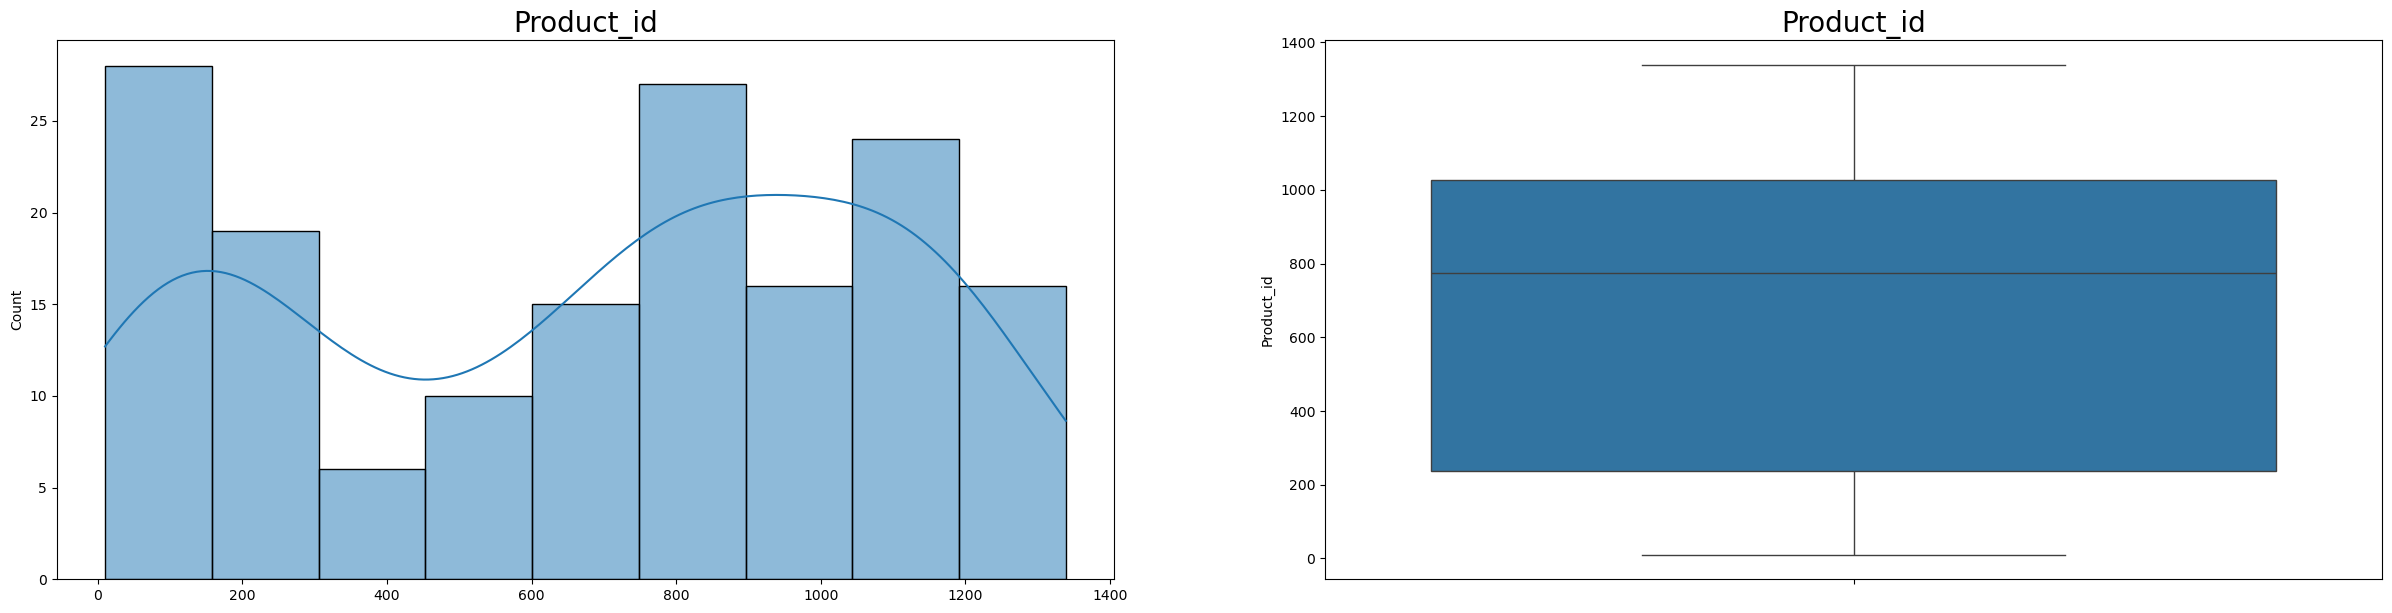

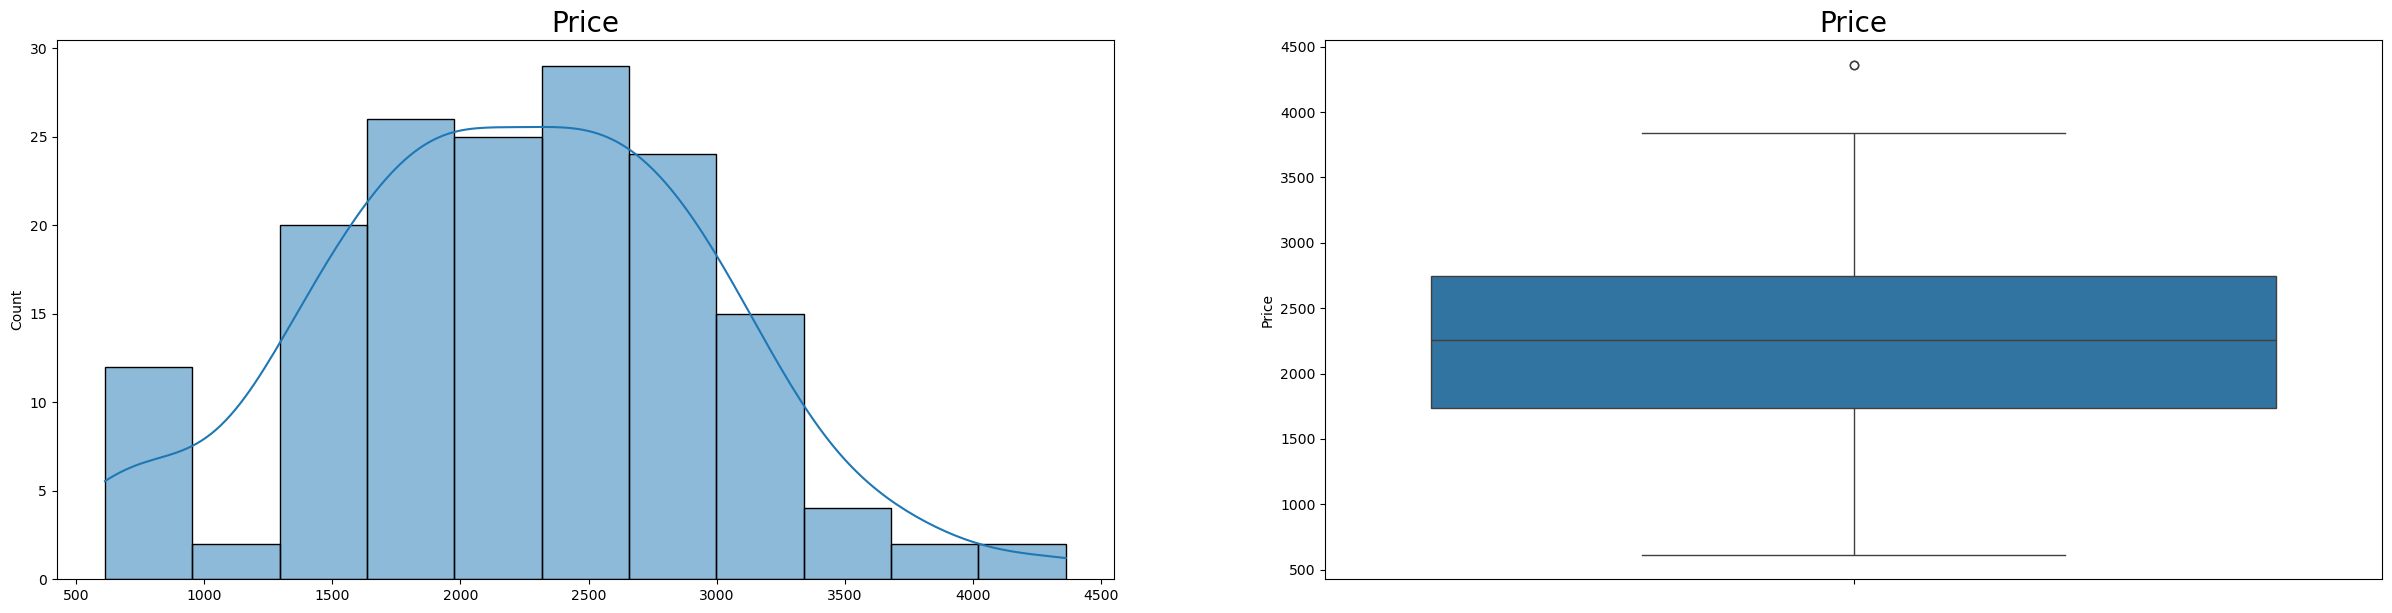

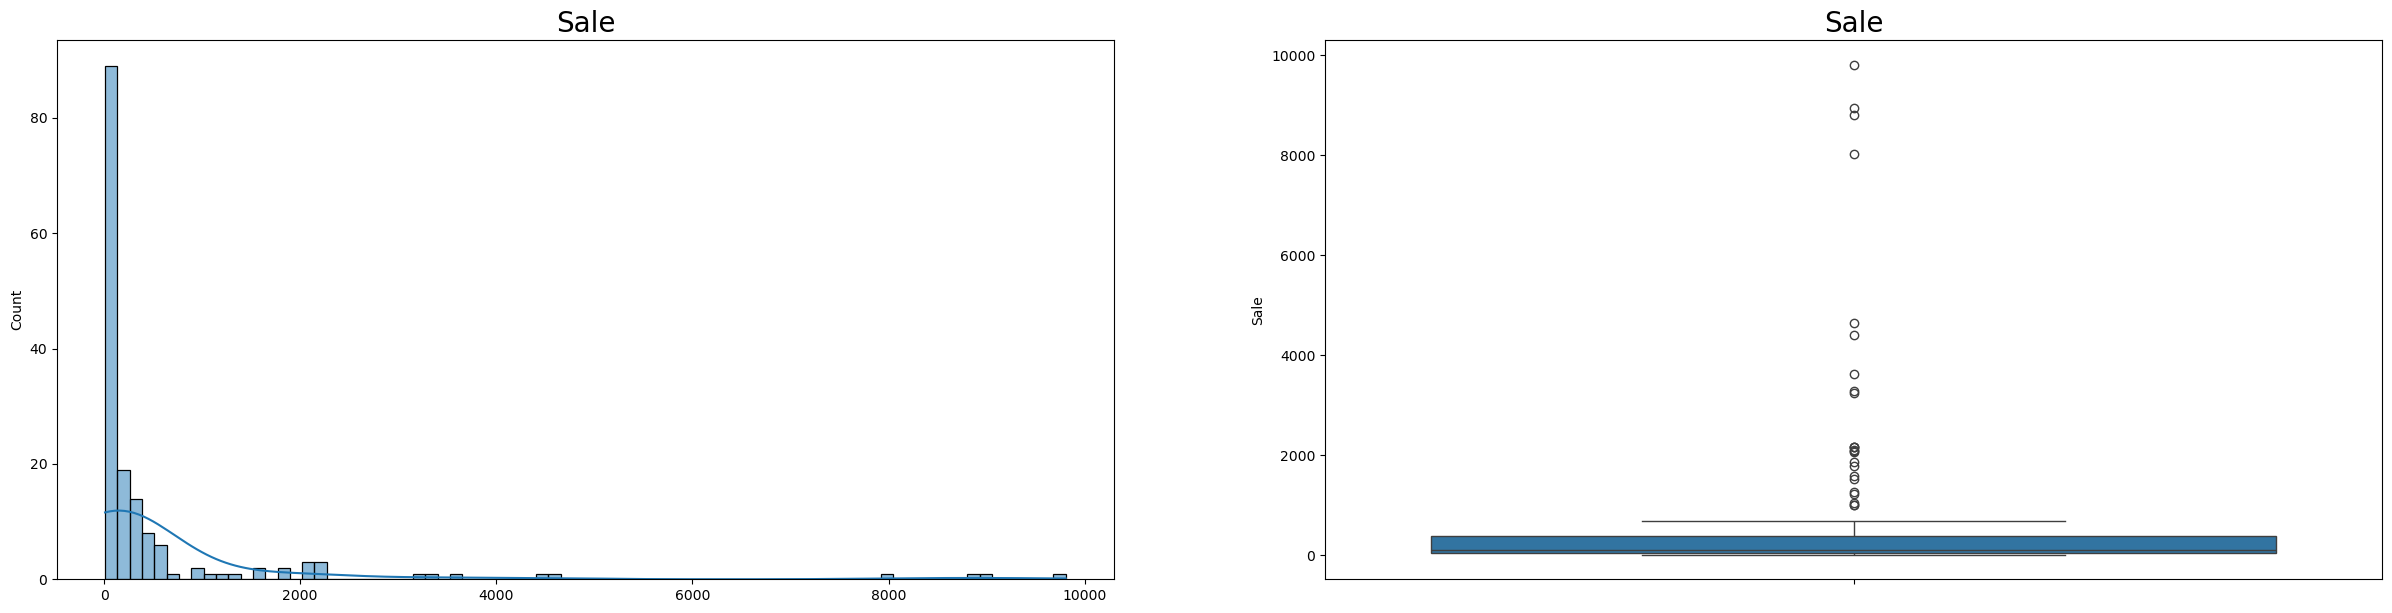

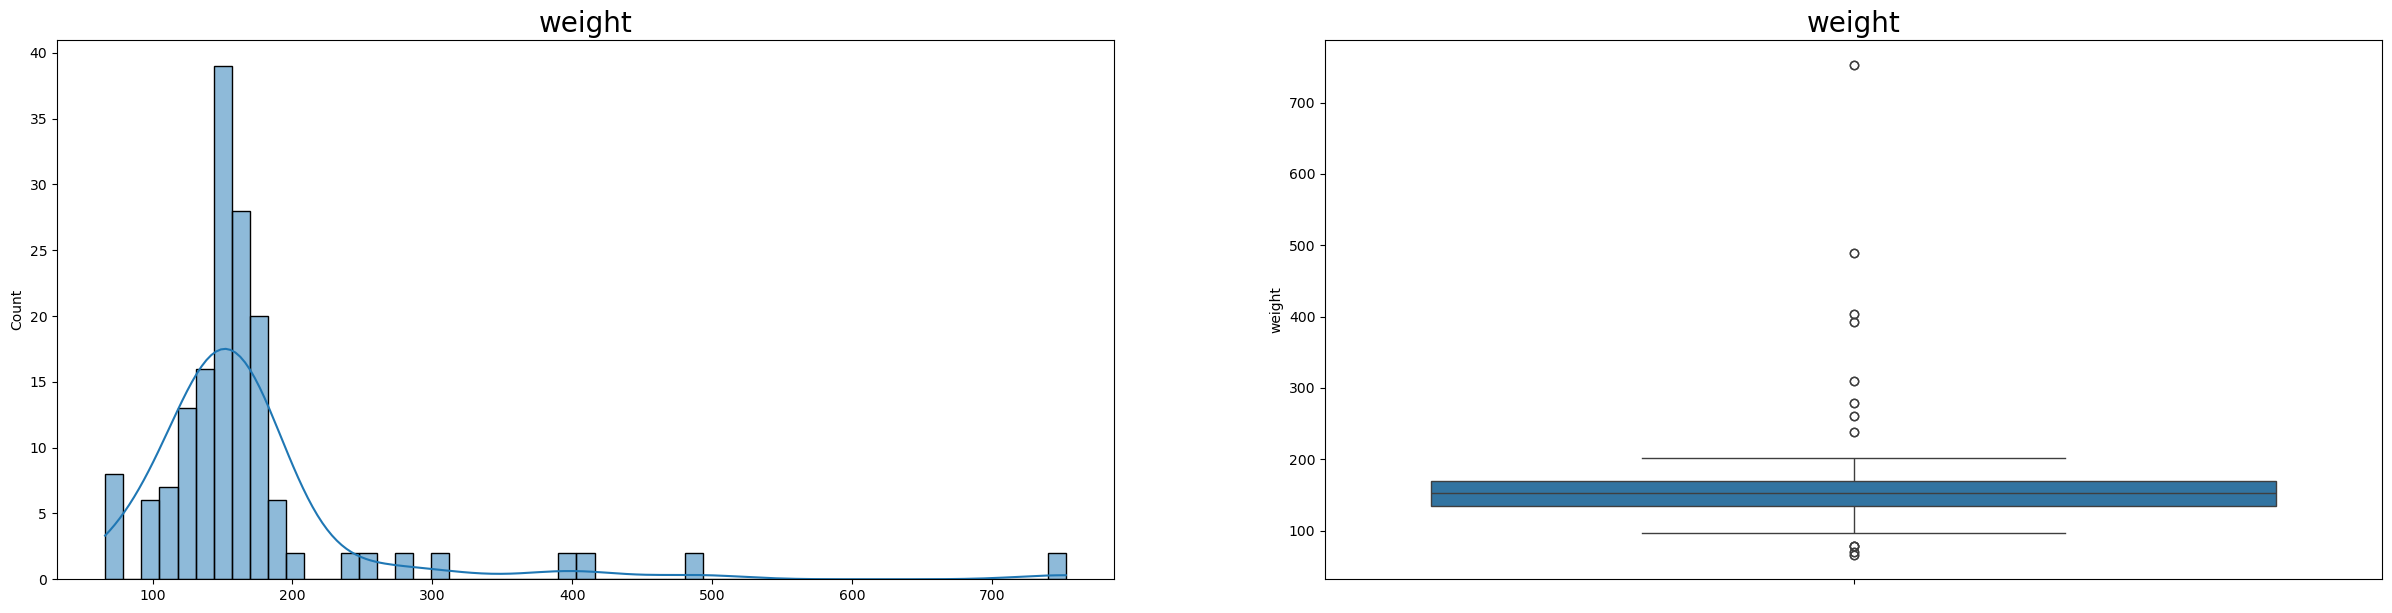

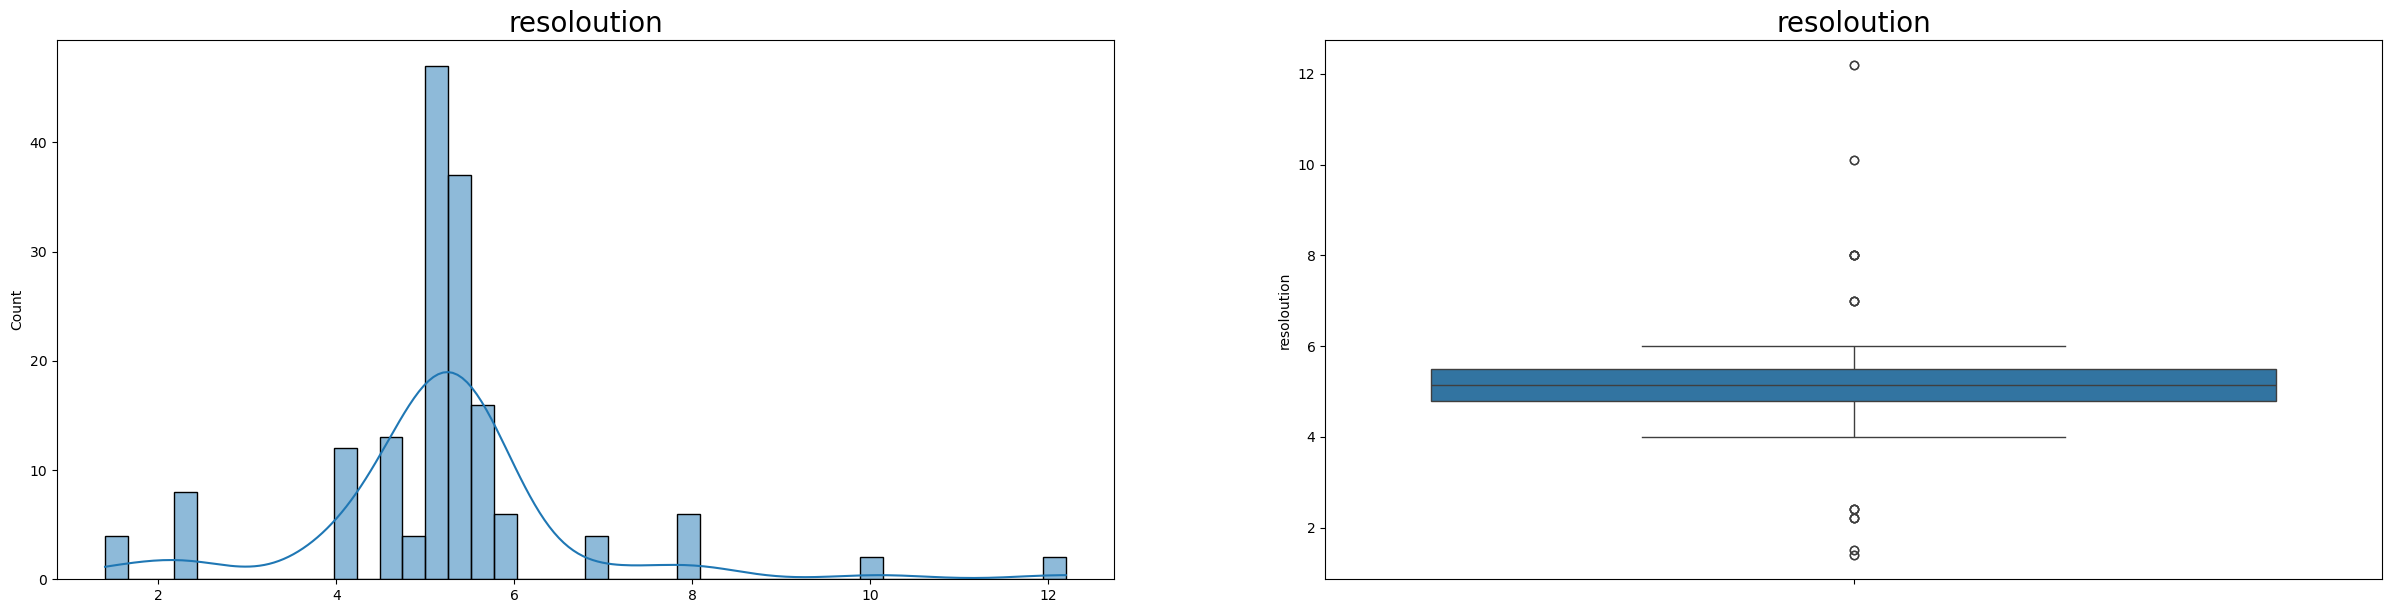

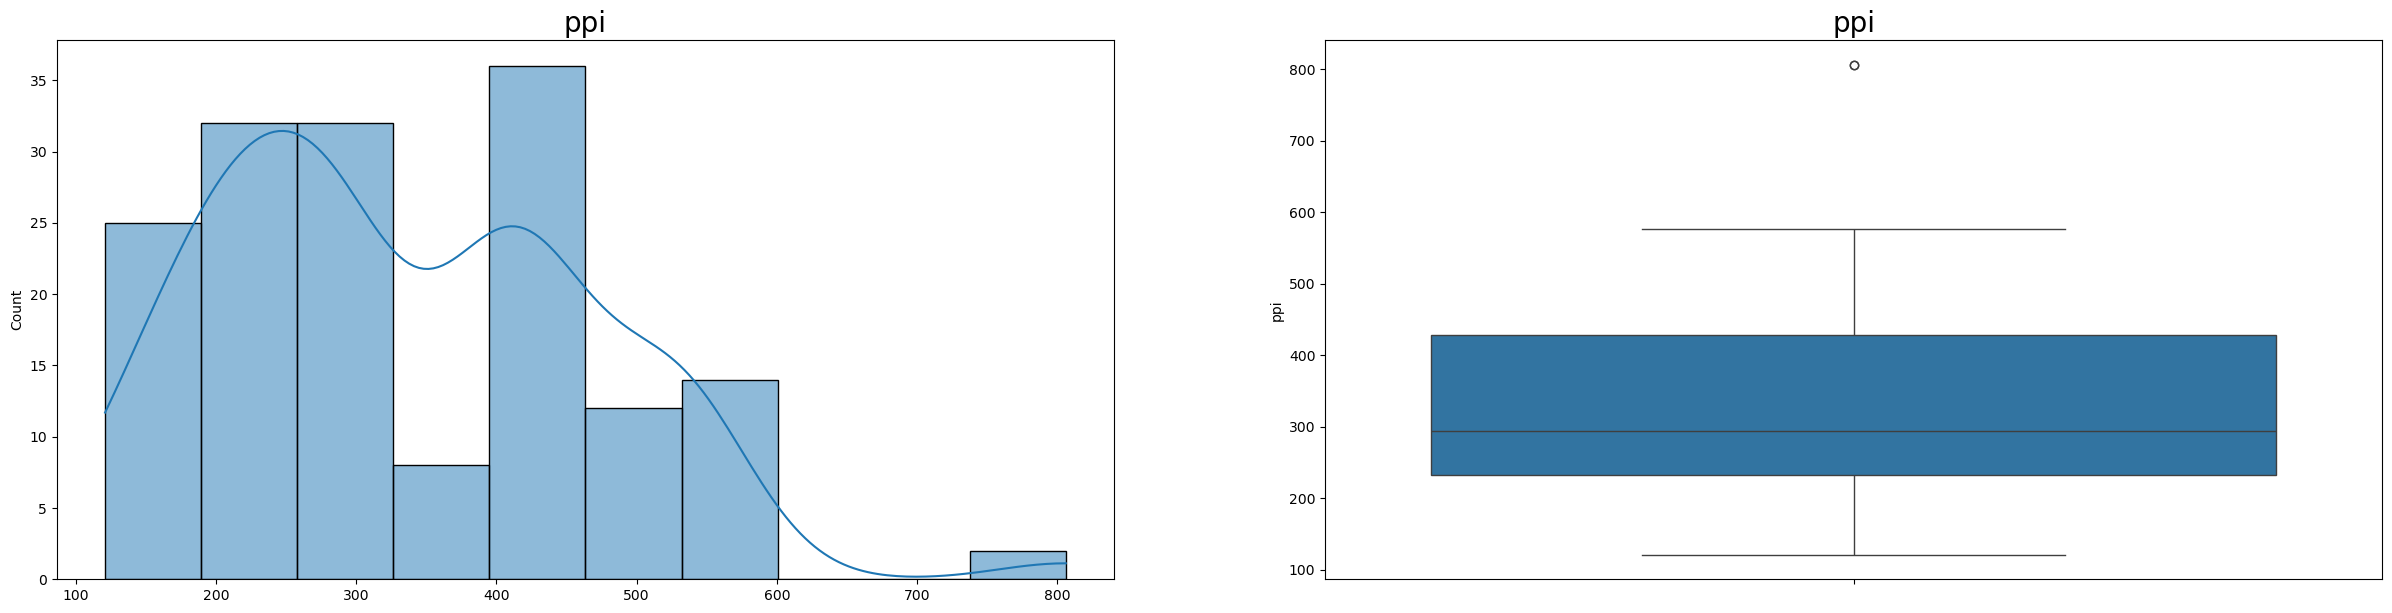

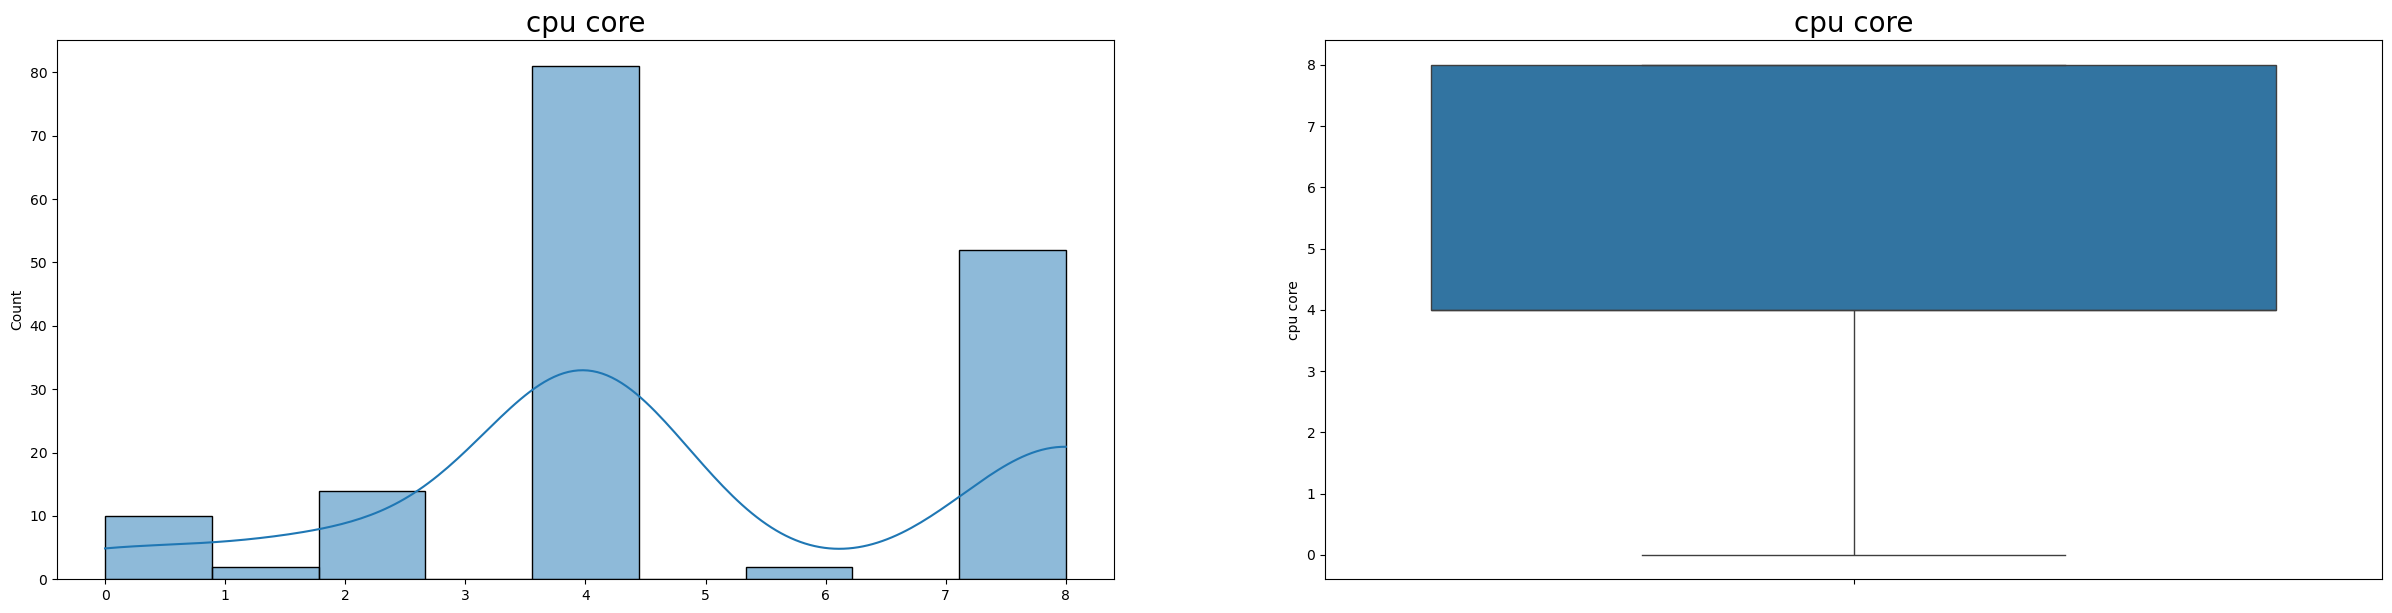

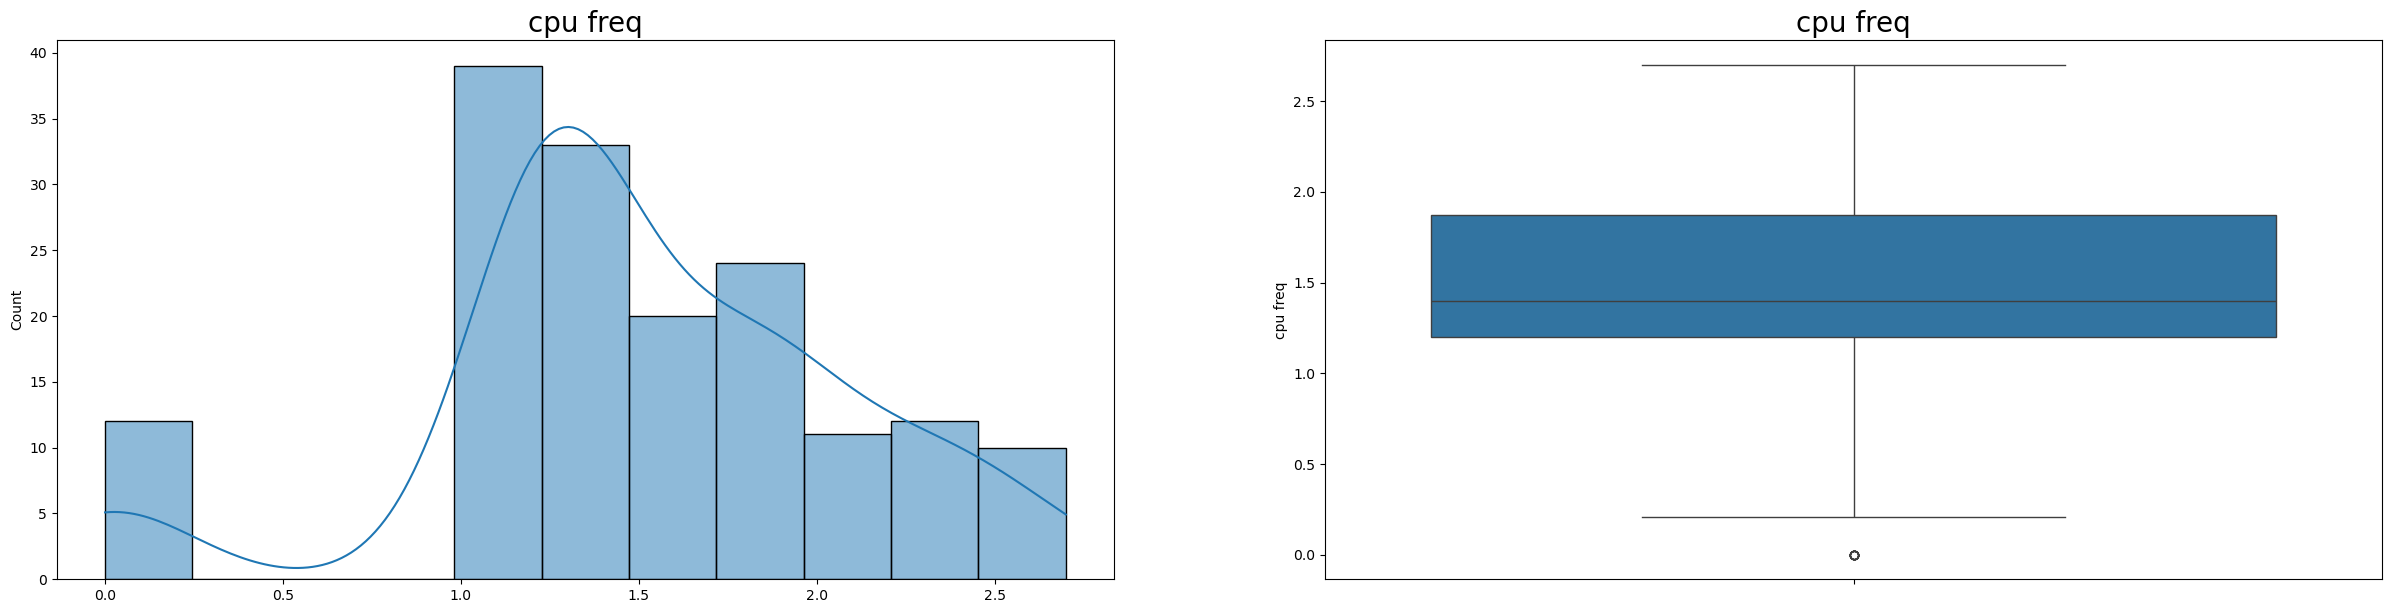

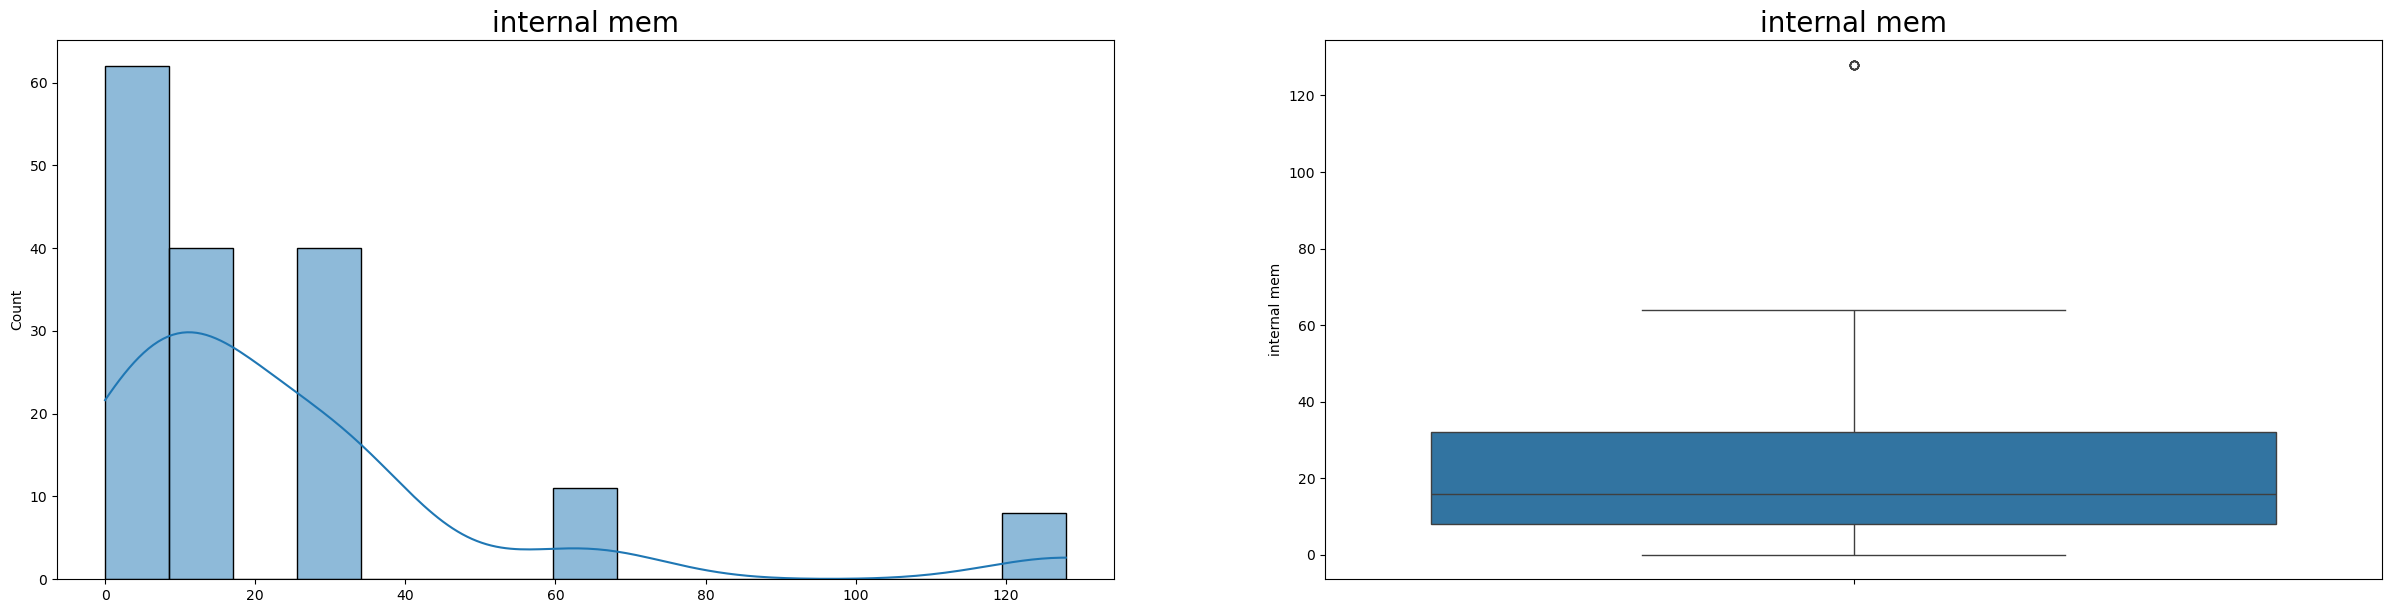

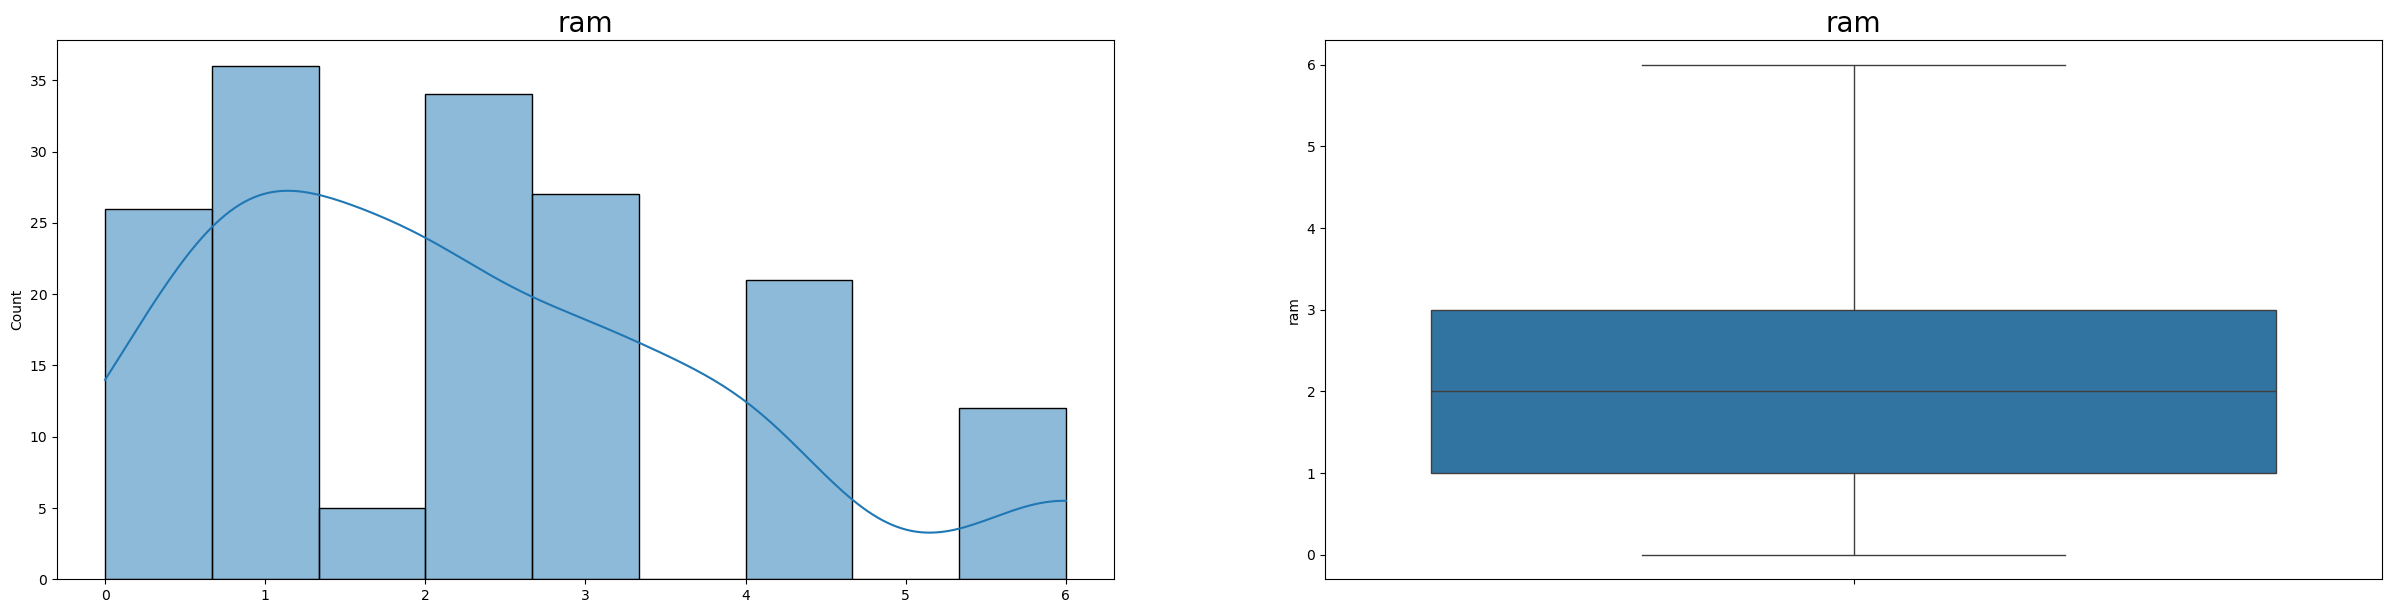

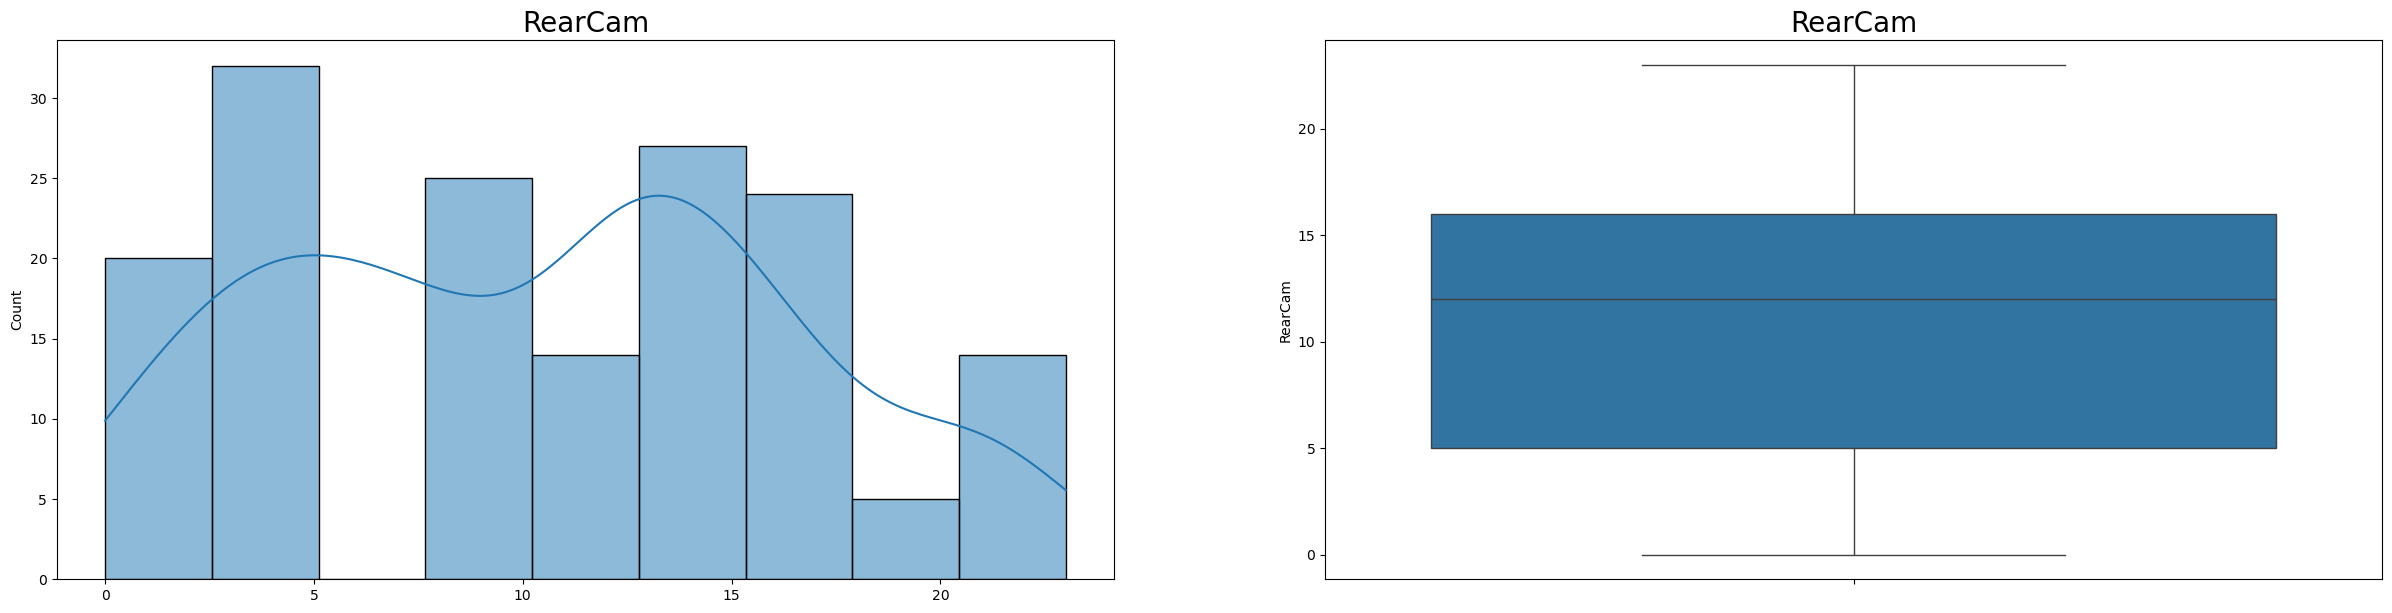

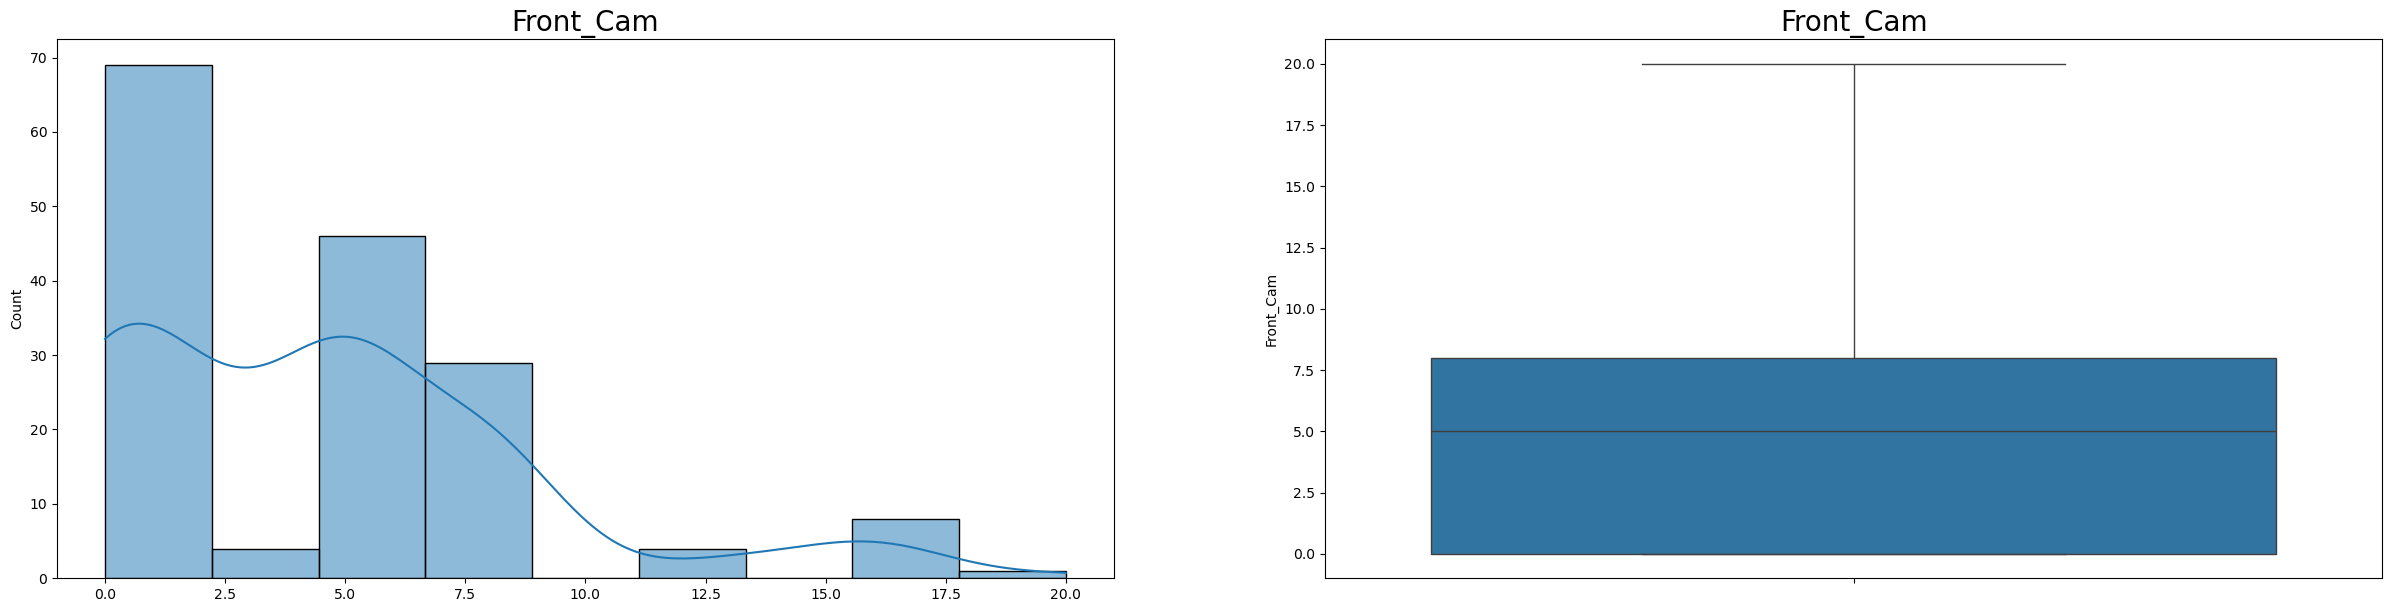

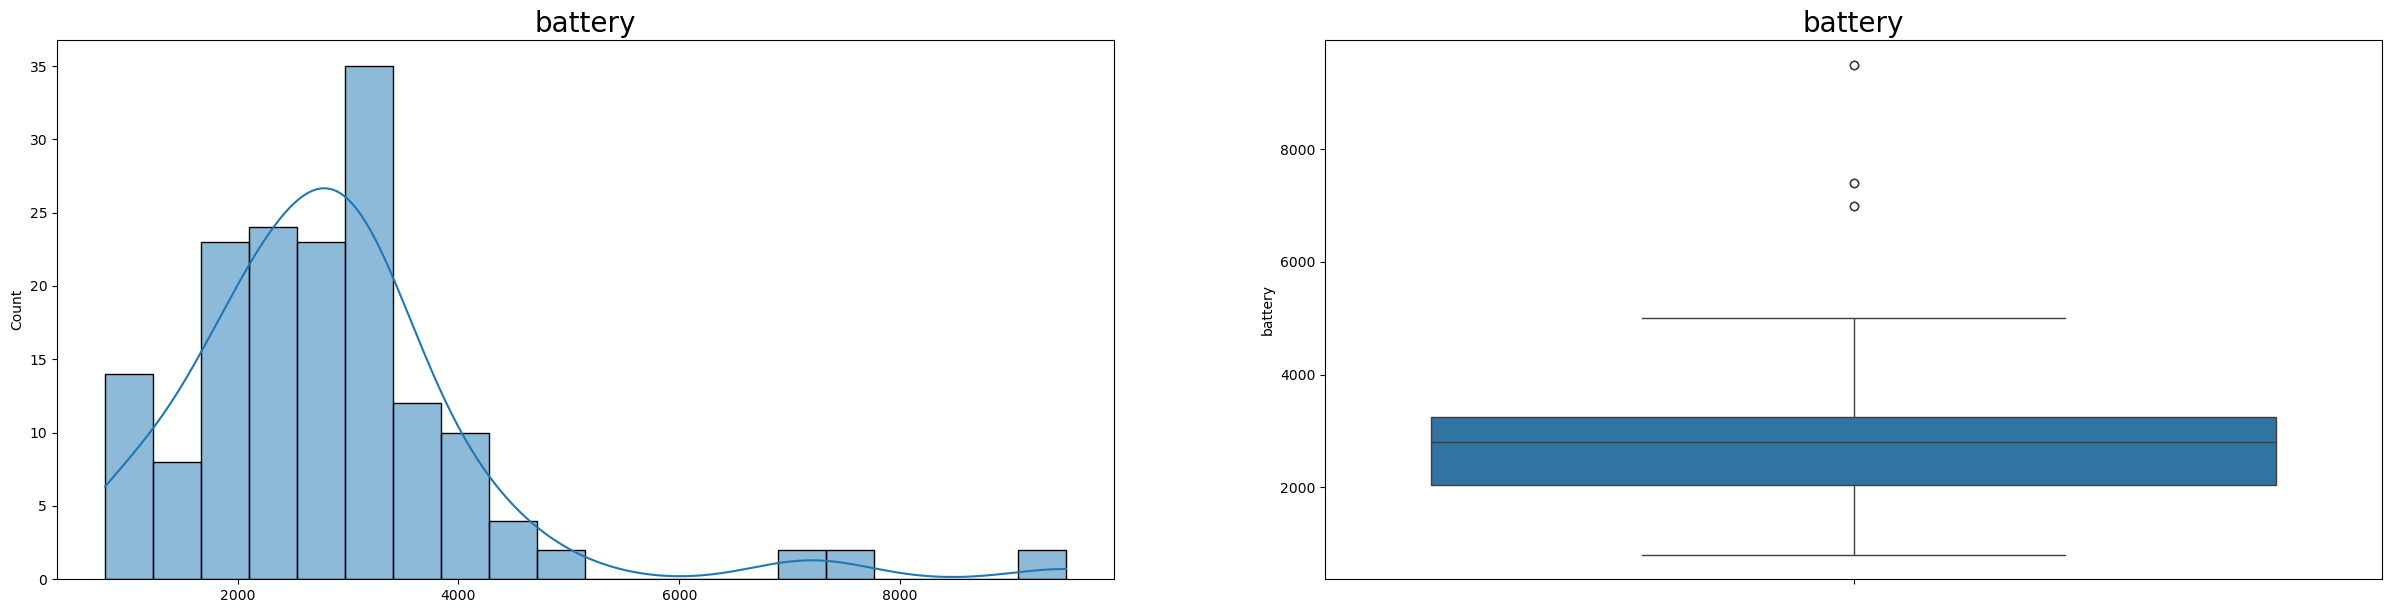

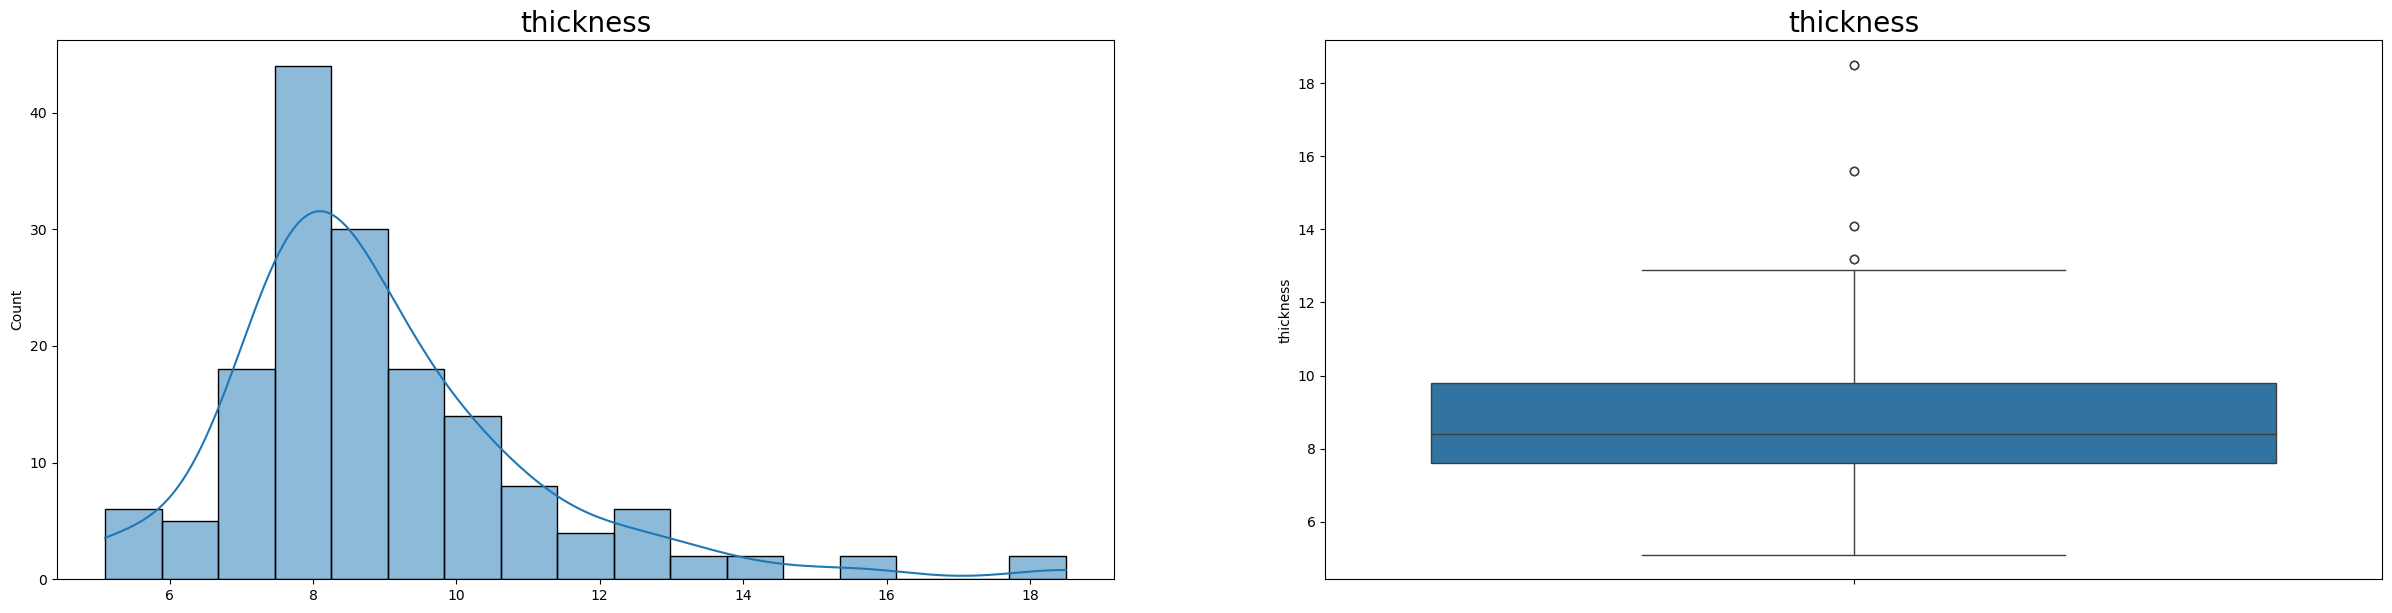

In [731]:
import matplotlib.pyplot as plt
import seaborn as sns

data_columns = data.columns

# Gives us the distribution and boxplot for all the columns.
for index, col in enumerate(data_columns):
    plt.figure(figsize=(30, 7))
    
    # Distribution plot with histplot
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)  # kde=True to include a KDE curve
    plt.xlabel("")
    plt.title(col, size=20)
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title(col, size=20)
    
    plt.show()


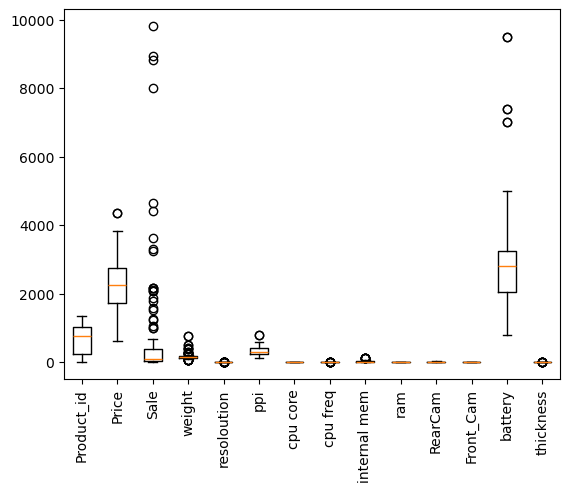

In [733]:
# Create a box plot for each feature in the DataFrame to visualize the distribution and identify outliers.
plt.boxplot(data,labels=data.columns)
plt.xticks(rotation=90)
plt.show()

In [735]:
def detect_outlier():
  for i in data.drop(['Price'],axis=1).columns:
    print()
    print('========================',i,'================================')

    # Calculate the 25th (n1) and 75th (n2) percentiles for the current column
    n1,n2=np.percentile(data[i],[25,75])

     # Calculate the Interquartile Range (IQR)
    iqr=n2-n1
    print('25%, 75%:   ',n1,', ',n2)

    # Calculate the lower and upper bounds for detecting outliers
    lower_bound=n1-(1.5*iqr)
    upper_bound=n2+(1.5*iqr)
    print('lower_bound, upper_bound:   ',lower_bound,', ',upper_bound)

     # Identify rows where the values are below the lower bound or above the upper bound (outliers)
    out=data[(data[i]<lower_bound) | (data[i]>upper_bound)]
    print('outliers_val: ',out[i].to_list())
    print('Total Outlier: ',round((len(out)/len(data))*100,2),'%')

  # Plotting outliers for each feature in a grid of subplots
  nrows=7
  ncols=2
  fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,25))
  for i , col in enumerate(data.drop(['Price'],axis=1).columns):
    sns.boxplot(data[col],ax=axes[i//ncols,i%ncols])
  plt.show()


======================== Product_id ================================
25%, 75%:    237.0 ,  1026.0
lower_bound, upper_bound:    -946.5 ,  2209.5
outliers_val:  []
Total Outlier:  0.0 %

======================== Sale ================================
25%, 75%:    37.0 ,  382.0
lower_bound, upper_bound:    -480.5 ,  899.5
outliers_val:  [996, 1009, 1043, 1224, 1274, 1530, 1584, 1781, 1862, 2071, 2088, 2106, 2159, 2171, 2173, 3248, 3291, 3619, 4408, 4638, 8016, 8809, 8946, 9807]
Total Outlier:  14.91 %

======================== weight ================================
25%, 75%:    134.1 ,  170.0
lower_bound, upper_bound:    80.24999999999999 ,  223.85000000000002
outliers_val:  [489.0, 489.0, 260.0, 260.0, 310.0, 310.0, 279.0, 66.0, 404.0, 279.0, 66.0, 404.0, 393.0, 393.0, 78.4, 78.4, 77.9, 77.9, 753.0, 753.0, 69.8, 69.8, 238.0, 238.0]
Total Outlier:  14.91 %

======================== resoloution ================================
25%, 75%:    4.8 ,  5.5
lower_bound, upper_bound:    3.7499999

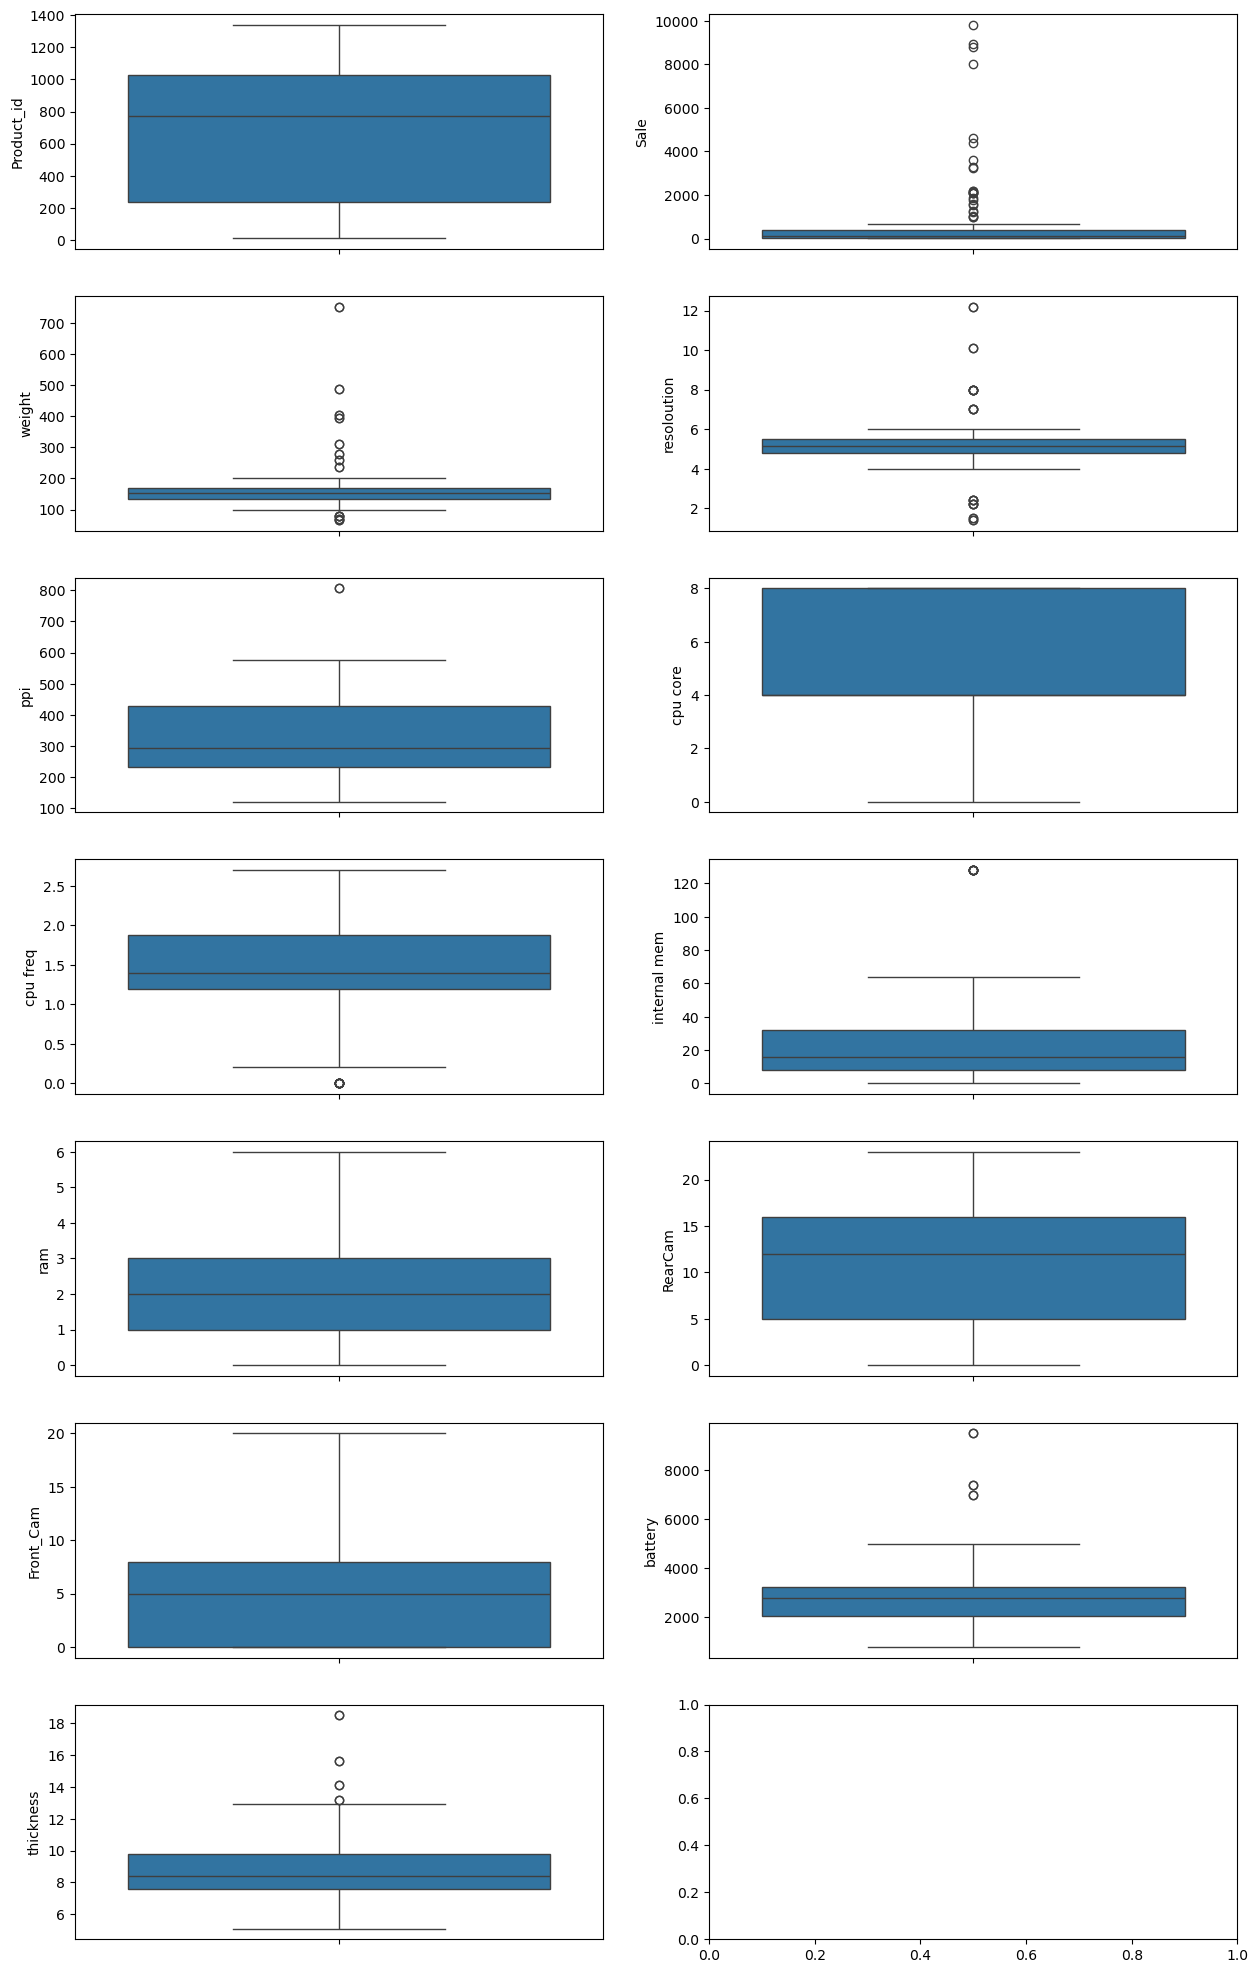

In [737]:
detect_outlier()

Here we can see that feature Product_id, cpu core, ram, RearCam, Front_cam have no outiers.

Feature sale:Here the shape of the data is less, so removing the outliers is not the best choice because this will lead to more loss of data, instead will try to replace the outlier value to nearest value.

Feature Weight: Here we can see that min value is 66 and max 753 in boxplot above, which is not possible (by research) so replacing values which are less then lower bound range to lower bound value and replacing values which are more then upper bound range to upper bound value.

Feature Resolution: Here we will replace the values which are less then lower bound value to the lower bound value and values above upper bound value to second max value from outlier because the difference is huge.

Feature ppi: Here we will replace outlier value with the upper bound value as its not possible that there will be 806 ppi.

Feature cpu freq: Here we can see that values are '0' which are outliers as we know it is not possible that cpu frequency will be 0 in any phase so will convert this outlier to 0.5, not with lower bound value because the range between lower bound value and min value is to high.

Feature internal mem: Here we will not remove this outliers, as we know 128 gb internal memmory is availabe so this is True.

Feature battery: Here we will not remove this outlier because it is possible this outlier value are actual values

Feature thickness: Here we will only change 18.5 value from other outlier because rest all are actual value, so changing only the above value to second maximum value not with upper bound as huge difference among them.

**Feature weight**

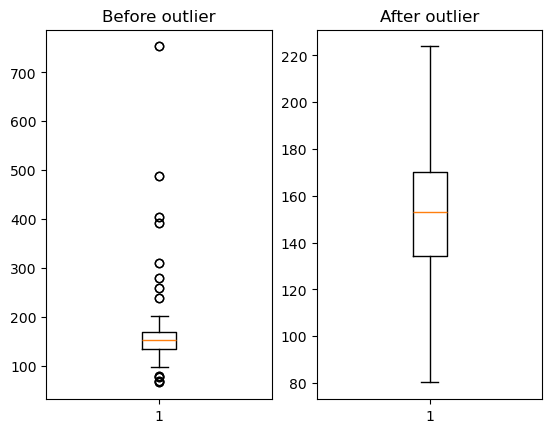

In [740]:
n1, n2 = np.percentile(data['weight'], [25, 75])
iqr = n2 - n1
# print('25%, 75%:   ', n1, ', ', n2)
lower_bound = n1 - (1.5 * iqr)
upper_bound = n2 + (1.5 * iqr)

plt.subplot(1, 2, 1)
plt.boxplot(data['weight'])
plt.title('Before outlier')

# Replacing 'df' with 'data' to modify the 'data' DataFrame
data['weight'] = np.where(data['weight'] > upper_bound, upper_bound, np.where(data['weight'] < lower_bound, lower_bound, data['weight']))

plt.subplot(1, 2, 2)
plt.boxplot(data['weight'])
plt.title('After outlier')

plt.show()


**Feature Resolution**

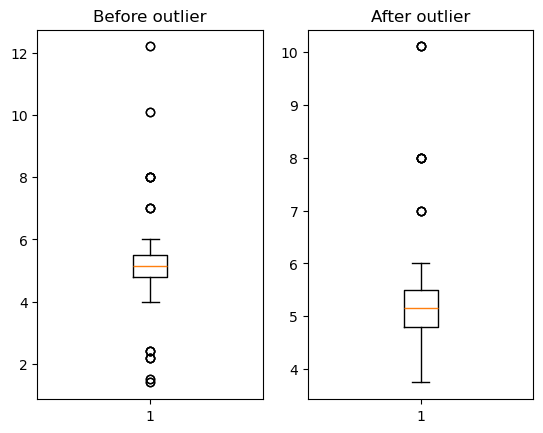

In [742]:
n1, n2 = np.percentile(data['resoloution'], [25, 75])
iqr = n2 - n1
# print('25%, 75%:   ', n1, ', ', n2)
lower_bound = n1 - (1.5 * iqr)
upper_bound = n2 + (1.5 * iqr)

plt.subplot(1, 2, 1)
plt.boxplot(data['resoloution'])
plt.title('Before outlier')

# Replacing 'df' with 'data' to modify the 'data' DataFrame
data['resoloution'] = np.where(data['resoloution'] >= 10.1, 10.1, np.where(data['resoloution'] < lower_bound, lower_bound, data['resoloution']))

plt.subplot(1, 2, 2)
plt.boxplot(data['resoloution'])
plt.title('After outlier')

plt.show()


**Feature PPI(Pixel Per inches)**

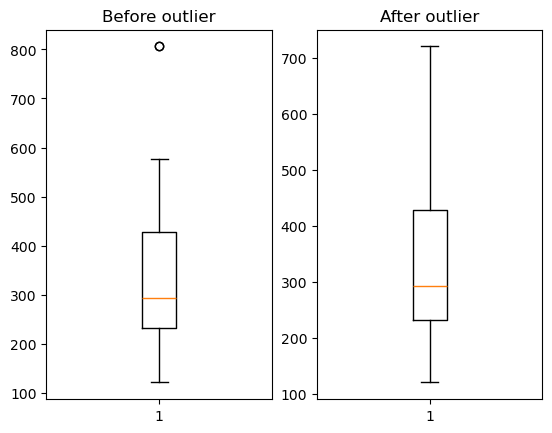

In [748]:
n1, n2 = np.percentile(data['ppi'], [25, 75])
iqr = n2 - n1
# print('25%, 75%:   ', n1, ', ', n2)
lower_bound = n1 - (1.5 * iqr)
upper_bound = n2 + (1.5 * iqr)

plt.subplot(1, 2, 1)
plt.boxplot(data['ppi'])
plt.title('Before outlier')

# Replacing 'df' with 'data' to modify the 'data' DataFrame
data['ppi'] = np.where(data['ppi'] > upper_bound, upper_bound, data['ppi'])

plt.subplot(1, 2, 2)
plt.boxplot(data['ppi'])
plt.title('After outlier')

plt.show()


**Feature cpu freq**

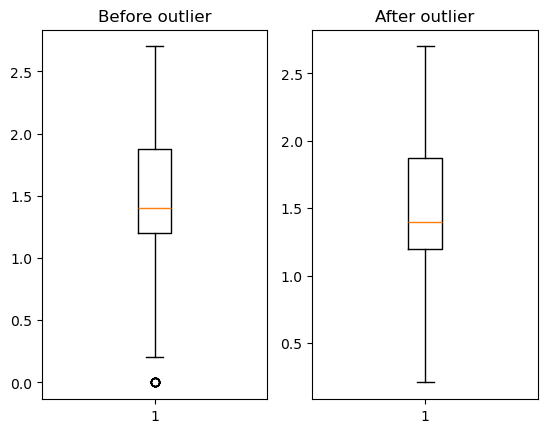

In [751]:
n1, n2 = np.percentile(data['cpu freq'], [25, 75])
iqr = n2 - n1
# print('25%, 75%:   ', n1, ', ', n2)
lower_bound = n1 - (1.5 * iqr)
upper_bound = n2 + (1.5 * iqr)

plt.subplot(1, 2, 1)
plt.boxplot(data['cpu freq'])
plt.title('Before outlier')

# Replacing 'df' with 'data' to modify the 'data' DataFrame
data['cpu freq'] = np.where(data['cpu freq'] < lower_bound, 0.5, data['cpu freq'])

plt.subplot(1, 2, 2)
plt.boxplot(data['cpu freq'])
plt.title('After outlier')

plt.show()


**Feature Thickness**

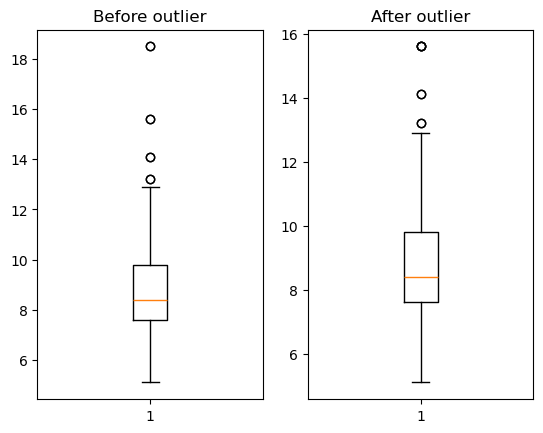

In [754]:
n1, n2 = np.percentile(data['thickness'], [25, 75])
iqr = n2 - n1
# print('25%, 75%:   ', n1, ', ', n2)
lower_bound = n1 - (1.5 * iqr)
upper_bound = n2 + (1.5 * iqr)

plt.subplot(1, 2, 1)
plt.boxplot(data['thickness'])
plt.title('Before outlier')

# Replacing 'df' with 'data' to modify the 'data' DataFrame
data['thickness'] = np.where(data['thickness'] >= 18.5, 15.6, data['thickness'])

plt.subplot(1, 2, 2)
plt.boxplot(data['thickness'])
plt.title('After outlier')

plt.show()


In [549]:
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In our mobile price prediction project, the plots we're generating serve to explore and visualize the data, which helps us understand the distribution and relationships between the features and the target variable (Price).

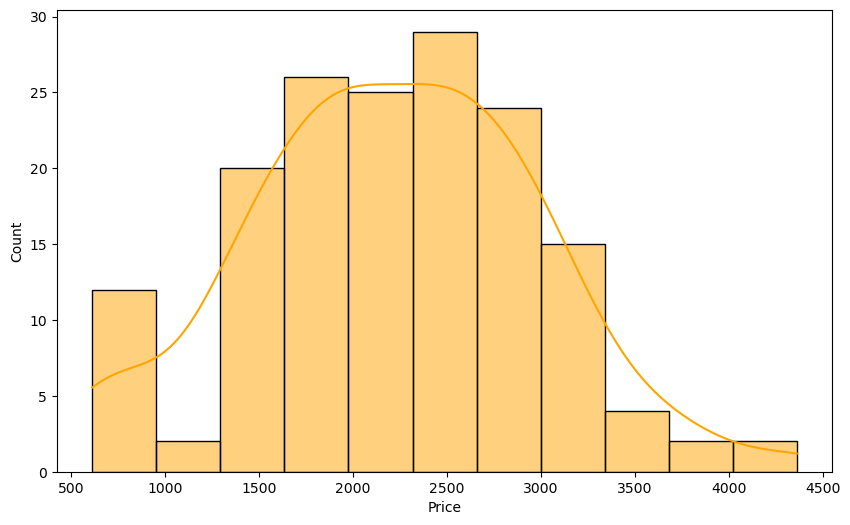

In [758]:
# price colum distribution using histogram
## Price column is normally distributed
plt.figure(figsize=(10,6))
sns.histplot(data['Price'],kde=True,color='orange')
plt.show()

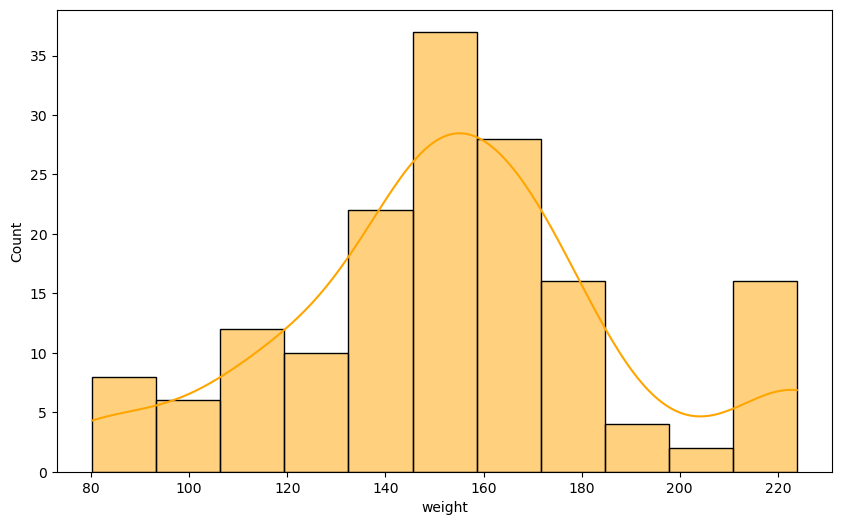

In [760]:
plt.figure(figsize=(10,6))
sns.histplot(data['weight'],kde=True,color='orange')
plt.show()
# The weight column seems not to be normally distributed in the dataset after treating outliers

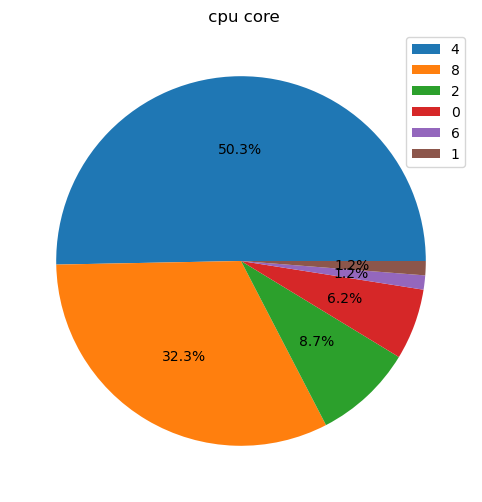

In [762]:
plt.figure(figsize=(10,6))
plt.pie(data['cpu core'].value_counts(),autopct = ("%1.1f%%"))
plt.title(" cpu core")
plt.legend(data['cpu core'].value_counts().index)
plt.show()
# Most of the smartphones have 4 CPU cores followed by 8 and 2 respectively

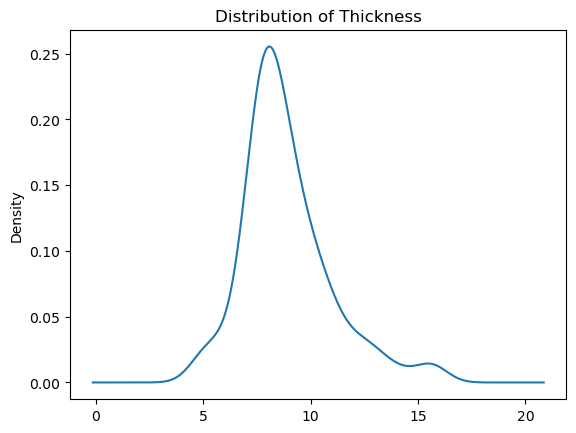

In [764]:
data['thickness'].plot(kind= 'kde')
plt.title("Distribution of Thickness")
plt.show()
# Most common density is around 9mm

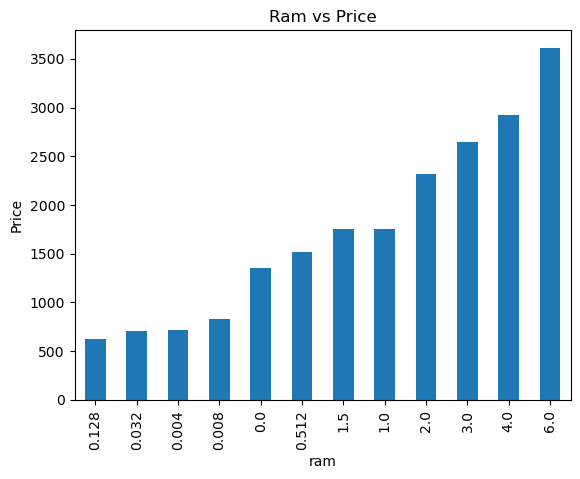

In [766]:
data.groupby('ram').Price.mean().sort_values().head(20).plot(kind = 'bar')
plt.ylabel("Price")
plt.title("Ram vs Price")
plt.show() 
# it shows that when ram increases then the price also increases

## 5.Feature Selection
In this project, we employ a correlation matrix as a feature selection technique. The correlation matrix evaluates the pairwise relationships between features and the target variable. Features with high correlation to the target variable are likely to contribute significantly to model performance, while features with high inter-correlation may be redundant.

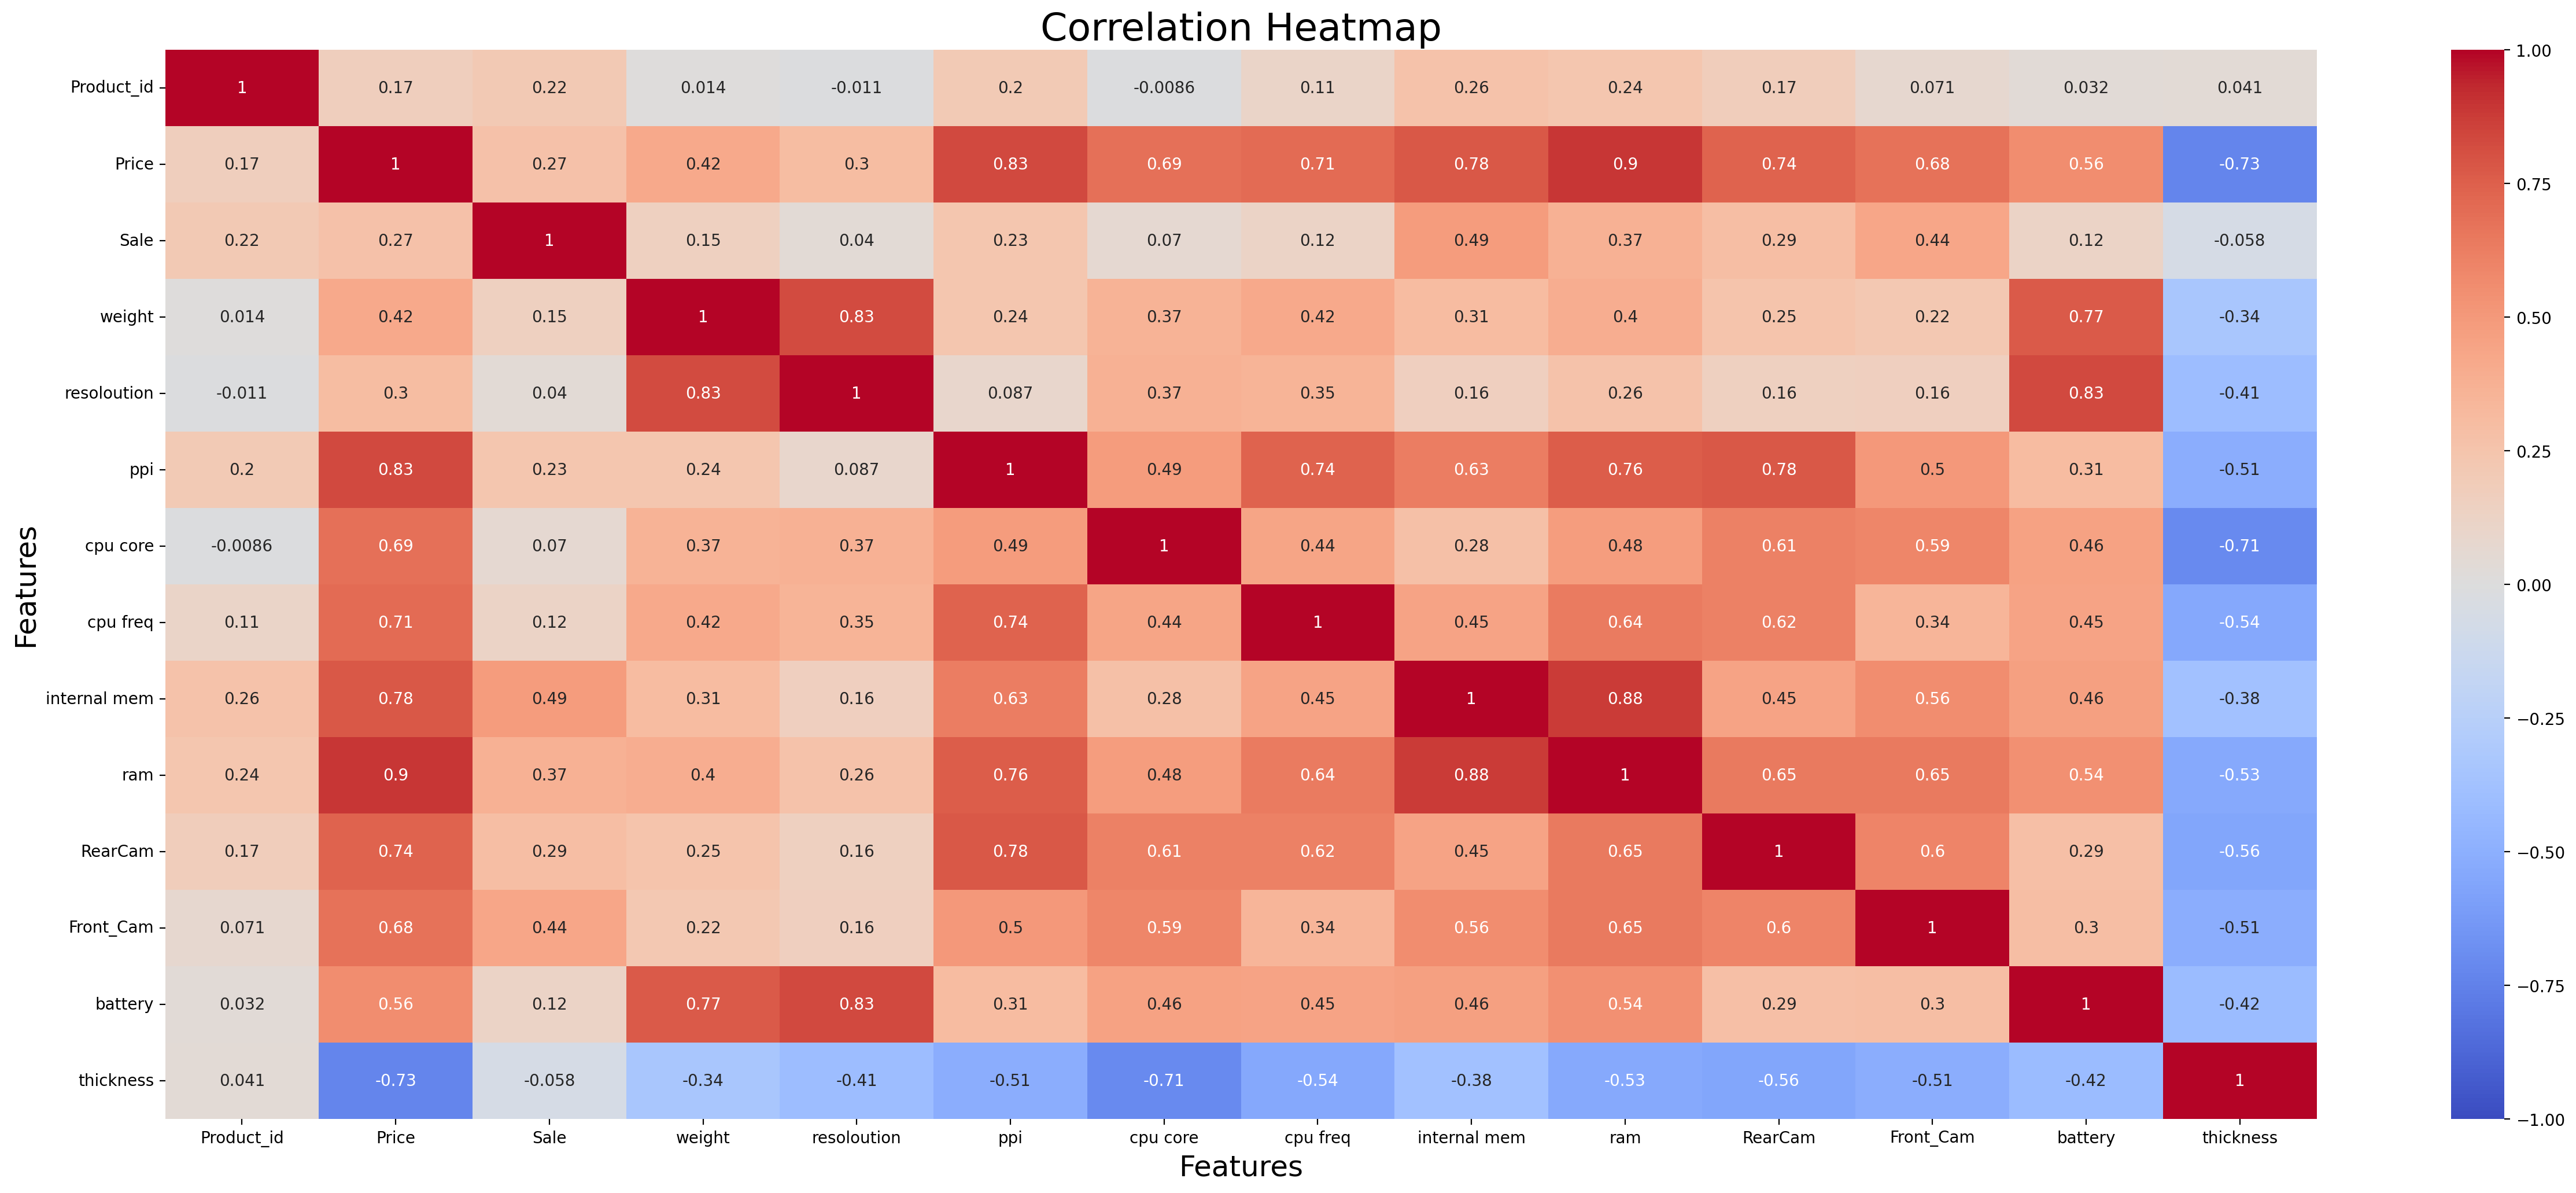

In [769]:
# Correlation between the independent and dependent variables
plt.figure(figsize = (30,12), dpi = 200)

sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = +1, cmap = "coolwarm")

# Adding titles and labels
plt.title("Correlation Heatmap", fontsize=24)  # Main title for the heatmap
plt.xlabel("Features", fontsize=18)            # X-axis label
plt.ylabel("Features", fontsize=18)            # Y-axis label
plt.show()

In [771]:
#select more correlated features for price
data.corr()['Price']

Product_id      0.165136
Price           1.000000
Sale            0.273263
weight          0.416154
resoloution     0.299431
ppi             0.829650
cpu core        0.686811
cpu freq        0.707892
internal mem    0.776738
ram             0.896915
RearCam         0.739538
Front_Cam       0.675286
battery         0.559946
thickness      -0.728842
Name: Price, dtype: float64

In [773]:
print(data.columns)


Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')


# **5.Data Preprocessing**
Data preprocessing is the process of cleaning and transforming raw data into a format suitable for analysis or machine learning. For the "Mobile Phone Price Predictor" project, the main goal is to ensure that the dataset is ready for training models like Linear Regression and Random Forest.

No any null values can be found in either training or the testing set. So we do not want to treat them.
No any categorical variables include in our dataset therefore we canot to handling them.

The correlation coefficient between Product_id and Price is 0.188480, which is very low. This indicates that Product_id has little to no relationship with Price.The correlation coefficient between Sale and Price is 0.259591, which is relatively low. While slightly higher than Product_id, it still does not strongly influence Price. Therefore we drop these columns.

In [775]:
# Drop unnecessary columns 'Product_id', 'Sale' from the dataset.
data = data.drop(columns=['Product_id', 'Sale'], errors='ignore')


## 6.Feature Scaling
This step ensures all numerical features are scaled to the same range (0 to 1). This is important for machine learning algorithms sensitive to feature magnitudesScaled data ensures that all features contribute equally to the model's performance and avoids biases due to large-value features dominating smaller-value features.The features like Price, battery, and ram may have vastly different ranges (e.g., Price might range from hundreds to thousands, while cpu core might be single digits). Scaling brings them to a uniform scale.

In [777]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler to scale features to a range of 0 to 1.
sc = MinMaxScaler() 
cols_to_n = ['Price', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']
data[cols_to_n] = sc.fit_transform(data[cols_to_n])

In [779]:
data.head()

,Price,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,0.465172,0.381267,0.228346,0.505421,1.00,0.458266,0.12500,0.500000,0.565217,0.40,0.208046,0.219048
1,0.302909,0.311630,0.039370,0.186822,0.25,0.438202,0.03125,0.166667,0.136957,0.00,0.103448,0.457143
2,0.347478,0.207173,0.149606,0.318599,0.50,0.398074,0.06250,0.250000,0.565217,0.25,0.137931,0.238095
3,0.187083,0.266365,0.039370,0.186822,0.25,0.438202,0.03125,0.085333,0.136957,0.00,0.068966,0.561905
4,0.302909,0.311630,0.039370,0.186822,0.25,0.438202,0.03125,0.166667,0.136957,0.00,0.103448,0.457143


In [781]:
# Display the dimensions of the data
data.shape

(161, 12)

In [783]:
# Create feature set 'X' by dropping the 'Price' column from the dataset.
X=data.drop('Price' ,axis=1)
# Set the target variable 'y' to the 'Price' column.
y = data["Price"]

In [785]:
#provides various tools for data analysis and machine learning
!pip install scikit-learn

## 6. Train test Split

In [786]:
# Split the dataset into training and testing sets
# test_size=0.25 means 25% of the data will be used for testing, and 75% for training
from sklearn.model_selection import train_test_split

# X_train, y_train: Training data used to train the model
# X_test, y_test: Testing data used to evaluate the model's performance
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size =0.25)

In [789]:
#Display dimention of training and test data 
X_train.shape, X_test.shape

((120, 11), (41, 11))

# **6.Model Implementation**
## Linerar Regression

In [791]:
#check accuracies of training and testing data sets
from sklearn.linear_model import LinearRegression

# Initialize a Linear Regression model.
reg = LinearRegression()

# Fit the Linear Regression model on the training data.
reg.fit(X_train, y_train)

# Evaluate the performance of the Linear Regression model on the train data.accuracy
reg.score(X_train, y_train)

0.9560439082429398

In [793]:
# Evaluate the performance of the Linear Regression model on the test data.
reg.score(X_test, y_test)

0.9483262388204614

## Random Forest Regressor

In [795]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest Regressor with 10 decision trees (n_estimators) 
# and a maximum depth of 5 for each tree to control overfitting.
rf = RandomForestRegressor(n_estimators=10, max_depth=5)

# Train the Random Forest Regressor on the training data 
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [797]:
# Evaluate the performance of the Linear Regression model on the train data.
rf.score(X_train, y_train)

0.9789039839751748

In [799]:
# Evaluate the performance of the Linear Regression model on the test data.
rf.score(X_test, y_test)

0.9503863402586464

In [801]:
#training data to obtain predicted target values
y_train_preds_rf = rf.predict(X_train)

# test data to generate predictions
y_test_preds_rf = rf.predict(X_test)

# **7.Model Evaluation**


## Linerar Regression

In [803]:
from sklearn.metrics import r2_score,mean_squared_error

#training data to obtain predicted target values
y_train_preds = reg.predict(X_train)

# test data to generate predictions
y_test_preds = reg.predict(X_test)

In [805]:
# R2 Error
print("R2 Error (Train set): ", r2_score(y_train, y_train_preds))
print("R2 Error (Test set): ", r2_score(y_test, y_test_preds))

R2 Error (Train set):  0.9560439082429398
R2 Error (Test set):  0.9483262388204614


In [807]:
# Mean Squred Error
print("Mean Squred Error (Train set): ", mean_squared_error(y_train, y_train_preds))
print("Mean Squred Error (Test set): ", mean_squared_error(y_test, y_test_preds))

Mean Squred Error (Train set):  0.0017864457916222777
Mean Squred Error (Test set):  0.0023252077426430366


## Random Forest Regressor

In [809]:
# R2 Error
print("R2 Error (Train set): ", r2_score(y_train, y_train_preds_rf))
print("R2 Error (Test set): ", r2_score(y_test, y_test_preds_rf))

R2 Error (Train set):  0.9789039839751748
R2 Error (Test set):  0.9503863402586464


In [811]:
# Mean Squred Error
print("Mean Squred Error (Train set): ", mean_squared_error(y_train, y_train_preds_rf))
print("Mean Squred Error (Test set): ", mean_squared_error(y_test, y_test_preds_rf))

Mean Squred Error (Train set):  0.000857375793458526
Mean Squred Error (Test set):  0.0022325076235622018


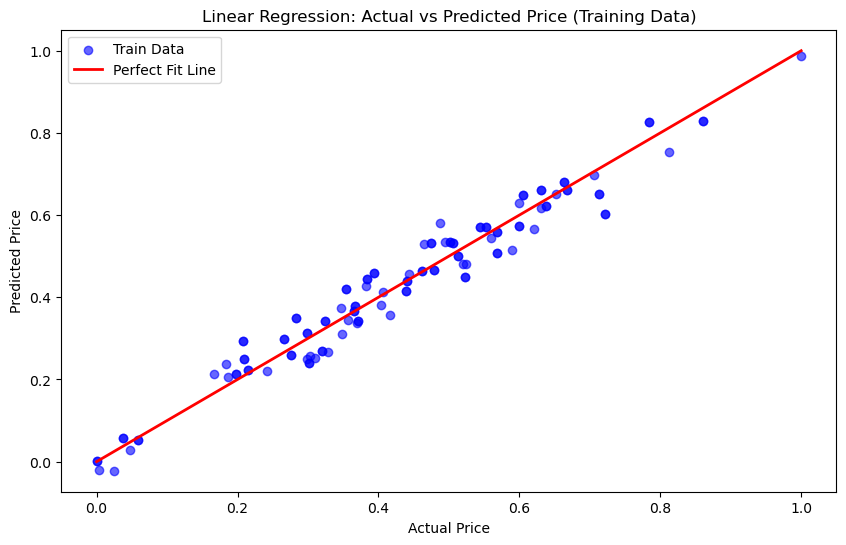

In [835]:
# Plot for Linear Regression (Training Data)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_preds, color='blue', alpha=0.6, label='Train Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2, label='Perfect Fit Line')
plt.title('Linear Regression: Actual vs Predicted Price (Training Data)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()



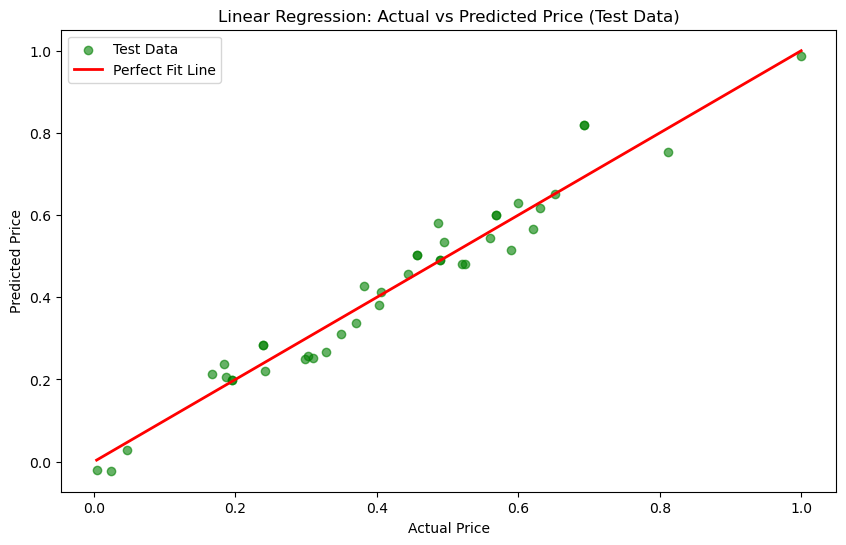

In [837]:
# Plot for Linear Regression (Test Data)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_preds, color='green', alpha=0.6, label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit Line')
plt.title('Linear Regression: Actual vs Predicted Price (Test Data)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


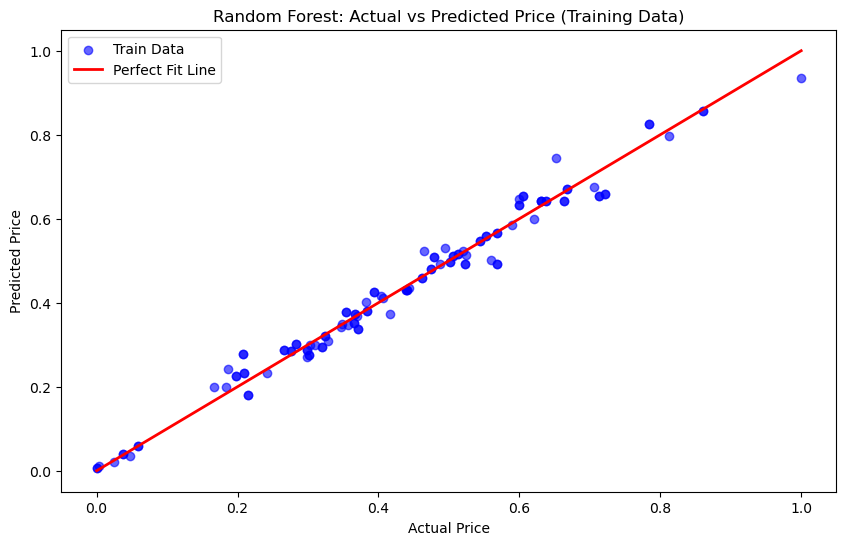

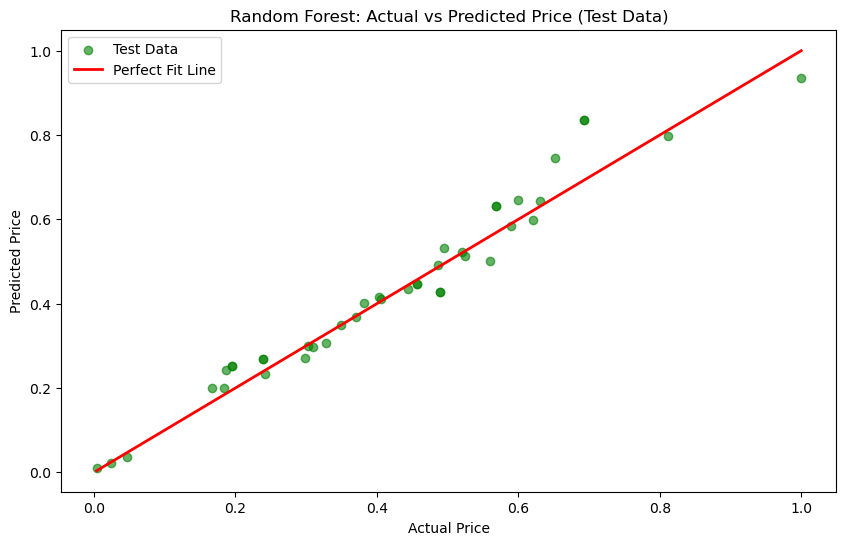

In [815]:
# Plot for Random Forest (Training Data)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_preds_rf, color='blue', alpha=0.6, label='Train Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2, label='Perfect Fit Line')
plt.title('Random Forest: Actual vs Predicted Price (Training Data)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# Plot for Random Forest (Test Data)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_preds_rf, color='green', alpha=0.6, label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit Line')
plt.title('Random Forest: Actual vs Predicted Price (Test Data)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


## **Cross Validation**

In our Mobile Price Predictor project, 5-Fold Cross-Validation is used to evaluate model performance more reliably by splitting the dataset into 5 equal parts. Each fold is used as a test set once, while the remaining 4 folds are used for training. This process ensures that every data point is used for testing exactly once, The model's performance is averaged across all folds, providing a robust estimate of how well it generalizes to unseen data and It reduces the risk of biased results and helps detect overfitting.


In [817]:
# Import the cross-validation function
from sklearn.model_selection import cross_validate

lr_cv = LinearRegression()
# Extract the R² scores for each fold

#splitting the dataset into 5 equal parts
cv_results = cross_validate(lr_cv, X_train, y_train, scoring = 'r2', cv = 5)
cv_results['test_score']

array([0.92136023, 0.89820022, 0.9541924 , 0.94481613, 0.9665593 ])

In [819]:
lr_cv.fit(X_train, y_train)

LinearRegression()

In [821]:
# average accuracies of testing and trainig after cross validation
lr_cv.score(X_train, y_train)

0.9560439082429398

In [823]:
lr_cv.score(X_test, y_test)

0.9483262388204614

In [825]:
rf_cv = RandomForestRegressor(n_estimators=10, max_depth=5)
cv_results = cross_validate(rf_cv, X_train, y_train, scoring = 'r2', cv = 5)
cv_results['test_score']

array([0.91985642, 0.9387948 , 0.91161718, 0.91197673, 0.93549385])

In [827]:
rf_cv.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [829]:
rf_cv.score(X_train, y_train)

0.9796663888193066

In [831]:
rf_cv.score(X_test, y_test)

0.9399787799881378

# **Discussion**

In this Mobile Price Prediction project, two popular machine learning models, Linear Regression and Random Forest, were implemented and evaluated to predict mobile phone prices. We used two key evaluation metrics—R² (coefficient of determination) and Mean Squared Error (MSE)—to assess the performance of both models on both training and testing datasets.

**Linear Regression**
Training Accuracy: The Linear Regression model achieved a train accuracy of 95.60%. This means the model explains 95.60% of the variance in the training data, which is very strong. Linear Regression typically works well when there is a linear relationship between the features and the target variable, as is the case in this dataset.

Test Accuracy: The model achieved a test accuracy of 94.83%, indicating that it generalizes well to unseen data. The slight decrease from the training accuracy suggests a small performance gap, which is typical in most models and indicates that the model has not overfitted to the training data.

R² Scores: The R² error for the training set was 0.9560, and for the test set, it was 0.9483. The R² score is close to 1, meaning that the model’s predictions are highly aligned with the actual data, both in training and test data. A small drop in R² from training to testing is expected, but it is still a strong indicator of the model's predictive power.

Mean Squared Error (MSE):

The MSE for the training set is 0.00179, indicating that the model's errors are minimal on the training data.
The MSE for the test set is 0.00233, which is slightly higher than the training MSE, reflecting a slight decrease in prediction accuracy on unseen data. However, the low MSE values show that the model is making accurate predictions.

**Random Forest**
Training Accuracy: The Random Forest model achieved a train accuracy of 97.89%. Random Forest is an ensemble model that can capture non-linear relationships between features, which helps it achieve a higher training accuracy compared to Linear Regression. This high train accuracy indicates that the model has learned a complex representation of the data.

Test Accuracy: The test accuracy of Random Forest is 95.04%, slightly lower than the training accuracy. The difference is small, suggesting that the model generalizes well to unseen data and has not overfitted to the training data, though it is more complex than Linear Regression.

R² Scores: The R² error for the training set is 0.9789, which is higher than Linear Regression, showing that Random Forest is able to explain 97.89% of the variance in the training data. For the test set, the R² score is 0.9504, which is still very high and indicates that the Random Forest model performs almost as well on unseen data as it does on the training data.

Mean Squared Error (MSE):

The MSE for the training set is 0.00086, lower than the MSE of Linear Regression, indicating that Random Forest is even more accurate on the training data.
The MSE for the test set is 0.00223, which is still very low, but slightly higher than the training MSE, suggesting that the model's performance slightly decreases when applied to unseen data. However, the difference in MSE values between the training and test sets is small, showing that the model is not overfitting and performs consistently across both datasets.

**Comparison of Both Models**

Model Complexity: Random Forest is an ensemble method that builds multiple decision trees and averages their predictions, allowing it to capture more complex relationships in the data. Linear Regression, on the other hand, assumes a linear relationship between the features and the target variable, which works well for simpler datasets or problems with linear patterns.

Performance:
Training Performance: Random Forest outperforms Linear Regression on the training data, achieving a higher accuracy (97.89% vs. 95.60%) and explaining more variance (R² of 0.9789 vs. 0.9560). This shows that Random Forest is better at fitting the training data, especially when non-linear relationships exist.

Test Performance: Random Forest also performs well on the test data with an accuracy of 95.04%, which is slightly lower than its training accuracy but still very strong. Linear Regression performs similarly on the test set (94.83%), which is impressive for such a simple model.
Overfitting: Both models show a minimal gap between training and test performance, suggesting that neither model is overfitting significantly. However, Random Forest's more complex structure may have a slight risk of overfitting compared to the simpler Linear Regression.

# **Conclution**

The Mobile Price Predictor project successfully utilized machine learning to estimate mobile phone prices based on key features such as RAM, storage, and battery capacity. A suitable dataset was sourced from Kaggle, followed by a detailed literature review to select appropriate models. Exploratory Data Analysis (EDA) revealed no missing or duplicate values, and preprocessing steps such as outlier treatment, feature scaling, and feature selection were conducted. Irrelevant columns like Product_id and Sales were dropped, and the data was split into training and test sets. Two models, Linear Regression and Random Forest, were implemented and evaluated using R² and Mean Squared Error (MSE) metrics. Linear Regression provided a solid baseline with an R² of 92.71% on the test set, while Random Forest captured more complex patterns with a test R² of 92.20%, though it showed slight overfitting. To ensure robustness, 5-fold cross-validation was applied to validate performance. The results demonstrate that machine learning models can effectively predict mobile phone prices, with Random Forest being preferred for capturing complex relationships. Future enhancements could include advanced algorithms or additional features to further improve accuracy.

# **References**

This study provides insights into different machine learning models for mobile phone price prediction, helping us understand comparative performances and guiding model selection and litreture review.

[1] https://www.researchgate.net/publication/379076746_Mobile_phone_price_prediction_A_comparative_study_among_four_models

This resource was used to enhance the documentation quality of the notebook, especially for creating well-structured Markdown cells.

[2] https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet


This article provides a concise explanation of the concepts and importance of Exploratory Data Analysis, which was crucial for our project's initial data analysis phase.

[3] https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/

This dataset was the foundation of our project

[4] https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction/data

This article provide how to do cross validation 

[5] https://scikit-learn.org/1.5/modules/cross_validation.html

This article provide how to do random forest algorithem supervised learning regression model training

[6] https://scikit-learn.org/stable/modules/ensemble.html#forest

This article provide how to do linear regression for train models

[7] https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html